# preprocessing for pretraining C

In [ ]:

#fucking change everything for c. this is done for CC
!onmt_preprocess -train_src training_data/c/pretrain-src-train.txt \
    -train_tgt training_data/c/pretrain-tgt-train.txt \
    -save_data data/c/pretrain_data \
    -src_vocab vocab/cc/target_vocab_cc_2000.txt \
    -tgt_vocab vocab/cc/target_vocab_cc_2000.txt \
    -src_vocab_size 2000 \
    -tgt_vocab_size 2000 \
    -src_seq_length 400 \
    -src_seq_length_trunc 400 \
    -tgt_seq_length 100 \
    -tgt_seq_length_trunc 100 \
    -dynamic_dict \
    -overwrite

#-valid_src raw_data/cc/mild-src-test.txt \
#    -valid_tgt raw_data/cc/mild-tgt-test.txt \

[2020-03-23 08:45:35,314 INFO] Extracting features...
[2020-03-23 08:45:35,315 INFO]  * number of source features: 0.
[2020-03-23 08:45:35,315 INFO]  * number of target features: 0.
[2020-03-23 08:45:35,315 INFO] Building `Fields` object...
[2020-03-23 08:45:35,315 INFO] Building & saving training data...
[2020-03-23 08:45:35,315 INFO] Using existing vocabulary...
[2020-03-23 08:45:35,315 INFO] Building vocab from text file...
[2020-03-23 08:45:35,315 INFO] Loading src vocabulary from vocab/cc/target_vocab_cc_2000.txt
[2020-03-23 08:45:35,320 INFO] Loaded src vocab has 2000 tokens.
[2020-03-23 08:45:35,321 INFO] Loading tgt vocabulary from vocab/cc/target_vocab_cc_2000.txt
[2020-03-23 08:45:35,325 INFO] Loaded tgt vocab has 2000 tokens.
[2020-03-23 08:45:42,760 INFO] Building shard 0.
[2020-03-23 08:59:18,386 INFO]  * tgt vocab size: 2004.
[2020-03-23 08:59:18,389 INFO]  * src vocab size: 2002.


In [ ]:
!onmt_train -data data/c/pretrain_data \
            -save_model models/c/pretrained_model_400_100/pretrained_model_400_100_base \
            -batch_size 60 \
            -report_every 200 \
            -world_size 1 \
            -gpu_ranks 0 \
            -copy_attn -global_attention mlp \
            -word_vec_size 128 \
            -rnn_size 512 \
            -layers 1 \
            -encoder_type brnn \
            -train_steps 500000 \
            -max_grad_norm 2 \
            -dropout 0. \
            -optim adagrad \
            -learning_rate 0.15 \
            -adagrad_accumulator_init 0.1 \
            -reuse_copy_attn \
            -copy_loss_by_seqlength\
            -bridge \
            -seed 777 \
            -save_checkpoint_steps 800 \
            -keep_checkpoint 400
            #-train_from models/cc/pretrained_model_600_100/pretrained_model_600_100_step_10400.pt
            #-overwrite
            #-log_file log/cc/log_cc_new_pointer_gen.txt 


[2020-03-23 09:15:37,132 INFO]  * src vocab size = 2002
[2020-03-23 09:15:37,133 INFO]  * tgt vocab size = 2004
[2020-03-23 09:15:37,133 INFO] Building model...
[2020-03-23 09:15:39,301 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(2002, 128, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(128, 256, bidirectional=True)
    (bridge): ModuleList(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): Linear(in_features=256, out_features=256, bias=True)
    )
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(2004, 128, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.0, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(640, 512)
     

[2020-03-23 16:44:03,571 INFO] Step 22800/500000; acc:  78.37; ppl:  2.76; xent: 1.01; lr: 0.15000; 6367/611 tok/s;  26904 sec
[2020-03-23 16:47:51,765 INFO] Step 23000/500000; acc:  78.27; ppl:  2.77; xent: 1.02; lr: 0.15000; 14464/1462 tok/s;  27132 sec
[2020-03-23 16:51:33,019 INFO] Step 23200/500000; acc:  77.35; ppl:  2.90; xent: 1.07; lr: 0.15000; 14836/1436 tok/s;  27354 sec
[2020-03-23 16:51:33,452 INFO] Saving checkpoint models/c/pretrained_model_400_100/pretrained_model_400_100_base_step_23200.pt
[2020-03-23 16:55:20,410 INFO] Step 23400/500000; acc:  77.91; ppl:  2.81; xent: 1.03; lr: 0.15000; 14467/1415 tok/s;  27581 sec
[2020-03-23 16:59:10,733 INFO] Step 23600/500000; acc:  77.94; ppl:  2.80; xent: 1.03; lr: 0.15000; 14302/1507 tok/s;  27811 sec
[2020-03-23 17:03:11,494 INFO] Step 23800/500000; acc:  76.87; ppl:  2.94; xent: 1.08; lr: 0.15000; 13900/1434 tok/s;  28052 sec
[2020-03-23 17:06:59,787 INFO] Step 24000/500000; acc:  77.97; ppl:  2.80; xent: 1.03; lr: 0.15000; 1

[2020-03-23 20:00:41,524 INFO] Step 33000/500000; acc:  78.69; ppl:  2.69; xent: 0.99; lr: 0.15000; 13125/1324 tok/s;  38702 sec
[2020-03-23 20:05:03,622 INFO] Step 33200/500000; acc:  78.91; ppl:  2.68; xent: 0.98; lr: 0.15000; 12521/1371 tok/s;  38964 sec
[2020-03-23 20:09:13,054 INFO] Step 33400/500000; acc:  79.14; ppl:  2.64; xent: 0.97; lr: 0.15000; 13203/1282 tok/s;  39214 sec
[2020-03-23 20:13:14,292 INFO] Step 33600/500000; acc:  79.47; ppl:  2.59; xent: 0.95; lr: 0.15000; 13722/1254 tok/s;  39455 sec
[2020-03-23 20:13:14,816 INFO] Saving checkpoint models/c/pretrained_model_400_100/pretrained_model_400_100_base_step_33600.pt
[2020-03-23 20:17:10,689 INFO] Step 33800/500000; acc:  78.66; ppl:  2.70; xent: 0.99; lr: 0.15000; 13615/1289 tok/s;  39691 sec
[2020-03-23 20:19:22,031 INFO] Loading dataset from data/c/pretrain_data.train.0.pt
[2020-03-23 20:23:23,536 INFO] number of examples: 677957
[2020-03-23 20:26:50,084 INFO] Step 34000/500000; acc:  79.20; ppl:  2.63; xent: 0.97;

[2020-03-23 23:23:12,065 INFO] Step 43200/500000; acc:  80.72; ppl:  2.45; xent: 0.90; lr: 0.15000; 12896/1407 tok/s;  50853 sec
[2020-03-23 23:23:12,555 INFO] Saving checkpoint models/c/pretrained_model_400_100/pretrained_model_400_100_base_step_43200.pt
[2020-03-23 23:27:26,013 INFO] Step 43400/500000; acc:  80.16; ppl:  2.48; xent: 0.91; lr: 0.15000; 13099/1301 tok/s;  51107 sec
[2020-03-23 23:31:25,504 INFO] Step 43600/500000; acc:  79.83; ppl:  2.51; xent: 0.92; lr: 0.15000; 13774/1286 tok/s;  51346 sec
[2020-03-23 23:35:31,989 INFO] Step 43800/500000; acc:  79.51; ppl:  2.56; xent: 0.94; lr: 0.15000; 12984/1303 tok/s;  51593 sec
[2020-03-23 23:39:34,519 INFO] Step 44000/500000; acc:  80.11; ppl:  2.51; xent: 0.92; lr: 0.15000; 13297/1336 tok/s;  51835 sec
[2020-03-23 23:39:34,944 INFO] Saving checkpoint models/c/pretrained_model_400_100/pretrained_model_400_100_base_step_44000.pt
[2020-03-23 23:43:53,962 INFO] Step 44200/500000; acc:  80.05; ppl:  2.49; xent: 0.91; lr: 0.15000; 1

[2020-03-24 02:41:25,186 INFO] Step 53200/500000; acc:  81.24; ppl:  2.35; xent: 0.85; lr: 0.07500; 15197/1420 tok/s;  62746 sec
[2020-03-24 02:45:29,874 INFO] Step 53400/500000; acc:  80.91; ppl:  2.40; xent: 0.88; lr: 0.07500; 13460/1381 tok/s;  62991 sec
[2020-03-24 02:49:41,848 INFO] Step 53600/500000; acc:  81.15; ppl:  2.38; xent: 0.87; lr: 0.07500; 13000/1330 tok/s;  63243 sec
[2020-03-24 02:49:42,275 INFO] Saving checkpoint models/c/pretrained_model_400_100/pretrained_model_400_100_base_step_53600.pt
[2020-03-24 02:53:43,877 INFO] Step 53800/500000; acc:  80.96; ppl:  2.38; xent: 0.87; lr: 0.07500; 13747/1250 tok/s;  63485 sec
[2020-03-24 02:57:50,899 INFO] Step 54000/500000; acc:  81.33; ppl:  2.34; xent: 0.85; lr: 0.07500; 13397/1342 tok/s;  63732 sec
[2020-03-24 03:01:58,077 INFO] Step 54200/500000; acc:  81.01; ppl:  2.38; xent: 0.87; lr: 0.07500; 13236/1307 tok/s;  63979 sec
[2020-03-24 03:06:12,384 INFO] Step 54400/500000; acc:  81.06; ppl:  2.38; xent: 0.87; lr: 0.07500;

# Big Net hyperparam search -> pretraining 

In [ ]:
!onmt_train -data data/c/pretrain_data \
            -save_model models/c/pretrained_model_400_100_double_layer_and_embedding/pretrained_model_400_100_base \
            -batch_size 40 \
            -report_every 200 \
            -world_size 1 \
            -gpu_ranks 0 \
            -copy_attn -global_attention mlp \
            -word_vec_size 256 \
            -rnn_size 512 \
            -layers 2 \
            -encoder_type brnn \
            -train_steps 500000 \
            -max_grad_norm 2 \
            -dropout 0. \
            -optim adagrad \
            -learning_rate 0.15 \
            -adagrad_accumulator_init 0.1 \
            -reuse_copy_attn \
            -copy_loss_by_seqlength\
            -bridge \
            -seed 777 \
            -save_checkpoint_steps 800 \
            -keep_checkpoint 400
            #-train_from models/cc/pretrained_model_600_100/pretrained_model_600_100_step_10400.pt
            #-overwrite
            #-log_file log/cc/log_cc_new_pointer_gen.txt 


[2020-03-24 07:22:37,632 INFO]  * src vocab size = 2002
[2020-03-24 07:22:37,632 INFO]  * tgt vocab size = 2004
[2020-03-24 07:22:37,632 INFO] Building model...
[2020-03-24 07:22:39,919 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(2002, 256, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(256, 256, num_layers=2, bidirectional=True)
    (bridge): ModuleList(
      (0): Linear(in_features=512, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(2004, 256, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.0, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(7

[2020-03-24 09:22:23,296 INFO] Step 7400/500000; acc:  73.33; ppl:  3.65; xent: 1.30; lr: 0.15000; 11727/1155 tok/s;   7183 sec
[2020-03-24 09:25:33,165 INFO] Step 7600/500000; acc:  73.10; ppl:  3.70; xent: 1.31; lr: 0.15000; 11589/1173 tok/s;   7373 sec
[2020-03-24 09:28:41,078 INFO] Step 7800/500000; acc:  72.04; ppl:  3.87; xent: 1.35; lr: 0.15000; 11493/1215 tok/s;   7561 sec
[2020-03-24 09:31:45,751 INFO] Step 8000/500000; acc:  72.28; ppl:  3.85; xent: 1.35; lr: 0.15000; 11620/1215 tok/s;   7746 sec
[2020-03-24 09:31:46,090 INFO] Saving checkpoint models/c/pretrained_model_400_100_double_layer_and_embedding/pretrained_model_400_100_base_step_8000.pt
[2020-03-24 09:34:52,198 INFO] Step 8200/500000; acc:  73.89; ppl:  3.55; xent: 1.27; lr: 0.15000; 11791/1139 tok/s;   7932 sec
[2020-03-24 09:38:14,348 INFO] Step 8400/500000; acc:  72.94; ppl:  3.72; xent: 1.31; lr: 0.15000; 10933/1222 tok/s;   8134 sec
[2020-03-24 09:41:12,504 INFO] Step 8600/500000; acc:  75.14; ppl:  3.36; xent:

[2020-03-24 15:49:14,990 INFO] Step 31000/500000; acc:  79.00; ppl:  2.65; xent: 0.98; lr: 0.15000; 11883/1072 tok/s;  30395 sec
[2020-03-24 15:52:24,514 INFO] Step 31200/500000; acc:  79.47; ppl:  2.58; xent: 0.95; lr: 0.15000; 11568/1069 tok/s;  30585 sec
[2020-03-24 15:52:24,945 INFO] Saving checkpoint models/c/pretrained_model_400_100_double_layer_and_embedding/pretrained_model_400_100_base_step_31200.pt
[2020-03-24 15:55:44,156 INFO] Step 31400/500000; acc:  78.89; ppl:  2.69; xent: 0.99; lr: 0.15000; 10962/1142 tok/s;  30784 sec
[2020-03-24 15:58:52,956 INFO] Step 31600/500000; acc:  79.94; ppl:  2.55; xent: 0.94; lr: 0.15000; 11620/1114 tok/s;  30973 sec
[2020-03-24 16:02:02,042 INFO] Step 31800/500000; acc:  79.69; ppl:  2.57; xent: 0.95; lr: 0.15000; 11699/1136 tok/s;  31162 sec
[2020-03-24 16:05:10,187 INFO] Step 32000/500000; acc:  78.80; ppl:  2.69; xent: 0.99; lr: 0.15000; 11554/1156 tok/s;  31350 sec
[2020-03-24 16:05:10,585 INFO] Saving checkpoint models/c/pretrained_mod

[2020-03-25 01:14:42,230 INFO] Step 65000/500000; acc:  81.94; ppl:  2.27; xent: 0.82; lr: 0.03750; 11480/1042 tok/s;  64322 sec
[2020-03-25 01:17:52,706 INFO] Step 65200/500000; acc:  81.85; ppl:  2.28; xent: 0.82; lr: 0.03750; 11551/1112 tok/s;  64513 sec
[2020-03-25 01:21:21,360 INFO] Step 65400/500000; acc:  81.60; ppl:  2.32; xent: 0.84; lr: 0.03750; 10507/1109 tok/s;  64721 sec
[2020-03-25 01:24:24,984 INFO] Step 65600/500000; acc:  83.44; ppl:  2.12; xent: 0.75; lr: 0.03750; 11883/1060 tok/s;  64905 sec
[2020-03-25 01:24:25,413 INFO] Saving checkpoint models/c/pretrained_model_400_100_double_layer_and_embedding/pretrained_model_400_100_base_step_65600.pt
[2020-03-25 01:27:49,727 INFO] Step 65800/500000; acc:  81.56; ppl:  2.33; xent: 0.84; lr: 0.03750; 10725/1160 tok/s;  65110 sec
[2020-03-25 01:30:54,578 INFO] Step 66000/500000; acc:  81.41; ppl:  2.33; xent: 0.84; lr: 0.03750; 11952/1086 tok/s;  65295 sec
[2020-03-25 01:34:05,229 INFO] Step 66200/500000; acc:  81.18; ppl:  2.3

[2020-03-25 04:04:41,336 INFO] Step 74800/500000; acc:  82.12; ppl:  2.25; xent: 0.81; lr: 0.01875; 11629/1061 tok/s;  74521 sec
[2020-03-25 04:07:50,234 INFO] Step 75000/500000; acc:  82.37; ppl:  2.22; xent: 0.80; lr: 0.01875; 11512/1083 tok/s;  74710 sec
[2020-03-25 04:11:07,201 INFO] Step 75200/500000; acc:  81.88; ppl:  2.28; xent: 0.82; lr: 0.01875; 11235/1115 tok/s;  74907 sec
[2020-03-25 04:11:07,729 INFO] Saving checkpoint models/c/pretrained_model_400_100_double_layer_and_embedding/pretrained_model_400_100_base_step_75200.pt
[2020-03-25 04:14:28,359 INFO] Step 75400/500000; acc:  81.72; ppl:  2.30; xent: 0.83; lr: 0.01875; 10967/1096 tok/s;  75108 sec
[2020-03-25 04:17:46,664 INFO] Step 75600/500000; acc:  80.92; ppl:  2.39; xent: 0.87; lr: 0.01875; 10894/1166 tok/s;  75307 sec
[2020-03-25 04:21:00,236 INFO] Step 75800/500000; acc:  80.76; ppl:  2.39; xent: 0.87; lr: 0.01875; 11080/1142 tok/s;  75500 sec
[2020-03-25 04:24:18,800 INFO] Step 76000/500000; acc:  81.82; ppl:  2.2

# main preprocessing and finetuning after pretraining starts here 

In [6]:
!onmt_preprocess -train_src ../c_raw_data/c/src-train.txt \
    -train_tgt ../c_raw_data/c/tgt-train.txt \
    -save_data data/c/training_data \
    -valid_src ../c_raw_data/c/src-test.txt \
    -valid_tgt ../c_raw_data/c/tgt-test.txt \
    -src_vocab vocab/cc/target_vocab_cc_2000.txt \
    -tgt_vocab vocab/cc/target_vocab_cc_2000.txt \
    -src_vocab_size 2000 \
    -tgt_vocab_size 2000 \
    -src_seq_length 400 \
    -src_seq_length_trunc 400 \
    -tgt_seq_length 100 \
    -tgt_seq_length_trunc 100 \
    -dynamic_dict \
    -overwrite

#-valid_src raw_data/cc/mild-src-test.txt \
#    -valid_tgt raw_data/cc/mild-tgt-test.txt \

[2020-03-25 04:31:37,935 INFO] Extracting features...
[2020-03-25 04:31:37,937 INFO]  * number of source features: 0.
[2020-03-25 04:31:37,937 INFO]  * number of target features: 0.
[2020-03-25 04:31:37,937 INFO] Building `Fields` object...
[2020-03-25 04:31:37,937 INFO] Building & saving training data...
[2020-03-25 04:31:37,937 INFO] Using existing vocabulary...
[2020-03-25 04:31:37,938 INFO] Building vocab from text file...
[2020-03-25 04:31:37,938 INFO] Loading src vocabulary from vocab/cc/target_vocab_cc_2000.txt
[2020-03-25 04:31:37,943 INFO] Loaded src vocab has 2000 tokens.
[2020-03-25 04:31:37,944 INFO] Loading tgt vocabulary from vocab/cc/target_vocab_cc_2000.txt
[2020-03-25 04:31:37,948 INFO] Loaded tgt vocab has 2000 tokens.
[2020-03-25 04:31:38,998 INFO] Building shard 0.
[2020-03-25 04:32:01,725 INFO]  * saving 0th train data shard to data/c/training_data.train.0.pt.
[2020-03-25 04:32:46,818 INFO]  * tgt vocab size: 2004.
[2020-03-25 04:32:46,821 INFO]  * src vocab size: 

In [ ]:
!onmt_train -data data/c/training_data \
            -save_model models/c/trained_model_400_100_double_layer_and_embedding_76000/trained_model_400_100_base \
            -batch_size 55 \
            -report_every 200 \
            -world_size 1 \
            -gpu_ranks 0 \
            -copy_attn -global_attention mlp \
            -word_vec_size 256 \
            -rnn_size 512 \
            -layers 2 \
            -encoder_type brnn \
            -train_steps 500000 \
            -max_grad_norm 2 \
            -dropout 0. \
            -optim adagrad \
            -learning_rate 0.05 \
            -adagrad_accumulator_init 0.1 \
            -reuse_copy_attn \
            -copy_loss_by_seqlength\
            -bridge \
            -seed 777 \
            -save_checkpoint_steps 800 \
            -keep_checkpoint 400 \
            -train_from models/c/pretrained_model_400_100_double_layer_and_embedding/pretrained_model_400_100_base_step_76000.pt
            #-overwrite
            #-log_file log/cc/log_cc_new_pointer_gen.txt 


[2020-03-25 05:02:59,503 INFO] Loading checkpoint from models/c/pretrained_model_400_100_double_layer_and_embedding/pretrained_model_400_100_base_step_76000.pt
[2020-03-25 05:02:59,574 INFO] Loading vocab from checkpoint at models/c/pretrained_model_400_100_double_layer_and_embedding/pretrained_model_400_100_base_step_76000.pt.
[2020-03-25 05:02:59,574 INFO]  * src vocab size = 2002
[2020-03-25 05:02:59,574 INFO]  * tgt vocab size = 2004
[2020-03-25 05:02:59,574 INFO] Building model...
[2020-03-25 05:03:01,818 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(2002, 256, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(256, 256, num_layers=2, bidirectional=True)
    (bridge): ModuleList(
      (0): Linear(in_features=512, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (decoder): InputFeedRNNDecoder(
    (embedd

[2020-03-25 07:49:46,359 INFO] Step 81800/500000; acc:  83.93; ppl:  2.10; xent: 0.74; lr: 0.00937; 10516/878 tok/s;  10004 sec
[2020-03-25 07:55:40,563 INFO] Step 82000/500000; acc:  83.96; ppl:  2.09; xent: 0.74; lr: 0.00937; 9875/874 tok/s;  10359 sec
[2020-03-25 07:59:39,855 INFO] Loading dataset from data/c/training_data.train.0.pt
[2020-03-25 07:59:58,175 INFO] number of examples: 56211
[2020-03-25 08:01:58,549 INFO] Step 82200/500000; acc:  83.98; ppl:  2.09; xent: 0.74; lr: 0.00937; 9069/838 tok/s;  10737 sec
[2020-03-25 08:12:40,580 INFO] Step 82600/500000; acc:  84.77; ppl:  2.01; xent: 0.70; lr: 0.00937; 10910/894 tok/s;  11379 sec
[2020-03-25 08:18:18,560 INFO] Step 82800/500000; acc:  83.74; ppl:  2.11; xent: 0.75; lr: 0.00937; 10427/890 tok/s;  11717 sec
[2020-03-25 08:24:11,707 INFO] Step 83000/500000; acc:  83.95; ppl:  2.09; xent: 0.74; lr: 0.00937; 9886/884 tok/s;  12070 sec
[2020-03-25 08:28:55,913 INFO] Loading dataset from data/c/training_data.train.0.pt
[2020-03-2

[2020-03-25 15:00:39,680 INFO] Saving checkpoint models/c/trained_model_400_100_double_layer_and_embedding_76000/trained_model_400_100_base_step_96800.pt
[2020-03-25 15:06:05,142 INFO] Step 97000/500000; acc:  84.91; ppl:  2.00; xent: 0.69; lr: 0.00469; 10664/896 tok/s;  36183 sec
[2020-03-25 15:11:55,084 INFO] Step 97200/500000; acc:  84.45; ppl:  2.04; xent: 0.71; lr: 0.00469; 10182/864 tok/s;  36533 sec
[2020-03-25 15:17:45,165 INFO] Step 97400/500000; acc:  85.04; ppl:  1.98; xent: 0.68; lr: 0.00469; 9982/860 tok/s;  36883 sec
[2020-03-25 15:20:13,706 INFO] Loading dataset from data/c/training_data.train.0.pt
[2020-03-25 15:20:35,008 INFO] number of examples: 56211
[2020-03-25 15:24:11,394 INFO] Step 97600/500000; acc:  84.71; ppl:  2.02; xent: 0.70; lr: 0.00469; 8906/842 tok/s;  37270 sec
[2020-03-25 15:24:11,610 INFO] Saving checkpoint models/c/trained_model_400_100_double_layer_and_embedding_76000/trained_model_400_100_base_step_97600.pt
[2020-03-25 15:29:31,825 INFO] Step 97800

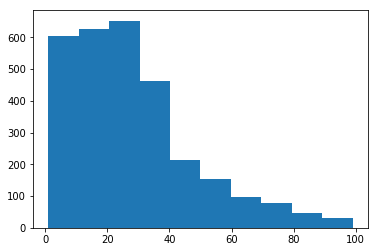

2961


In [26]:
#training on 130400
import matplotlib.pyplot as plt
%matplotlib inline
a = open('cc_raw_data/cc/tgt-test.txt','r',  encoding = 'utf-8').readlines()
lst = []

for i in a:
    lst.append(len(i.split(' ')))
plt.hist(lst)
plt.show()
print(len(lst))
#print(len(a))

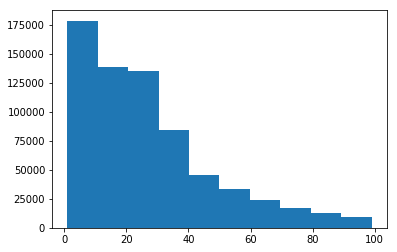

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
a = open('raw_data/cc/pretrain-tgt-train.txt','r',  encoding = 'utf-8').readlines()
lst = []
for i in a:
    lst.append(len(i.split(' ')))
plt.hist(lst)
plt.show()
#print(len(a))

In [2]:
!pip  install openNMT-py

     |████████████████████████████████| 194kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 51kB 6.5MB/s  eta 0:00:01
     |████████████████████████████████| 2.2MB 9.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 9.2MB/s  eta 0:00:01
     |████████████████████████████████| 753.4MB 7.2kB/s  eta 0:00:01    |███▊                            | 87.2MB 56.4MB/s eta 0:00:12     |████████▉                       | 207.2MB 55.8MB/s eta 0:00:10     |████████████████                | 378.7MB 50.0MB/s eta 0:00:08     |█████████████████               | 402.1MB 57.8MB/s eta 0:00:07     |█████████████████▋              | 415.7MB 57.8MB/s eta 0:00:06     |███████████████████▋            | 462.1MB 39.2MB/s eta 0:00:08     |█████████████████████           | 491.9MB 39.2MB/s eta 0:00:07     |███████████████████████▋        | 554.7MB 52.4MB/s eta 0:00:04     |█████████████████████████▍      | 598.0MB 52.4MB/s eta 0:00:03     |████████████████████████████▎   | 665.3MB 40.4MB/s e

In [2]:
#for single running
import matplotlib.pyplot as plt
from os import path
%matplotlib inline

#preprocessed_cc_pointer_gen_without_space_step_800.pt
cp = 76000
checkpoint_number = cp
#cnt+=1
print("checkpoint = ", cp)
model_name = 'trained_model_400_100_double_layer_and_embedding_76000/trained_model_400_100_base'
out_file = 'pretrained_model_400_100_double_layer_and_embedding'+"out-{}.txt".format(checkpoint_number)
checkpoint = model_name+"_step_{}.pt".format(checkpoint_number)
#print("######### ", path.exists("output/c/"+out_file))
if not path.exists("output/c/"+out_file):
    !onmt_translate -gpu 0 \
               -batch_size 120 \
               -model models/c/$checkpoint \
               -src ../c_raw_data/c/src-test.txt \
               -output output/c/$out_file \
               -max_length 100 \
               -stepwise_penalty \
               -beta 5 \
               -length_penalty wu \
               -alpha 0.9 \
               -replace_unk \
               -block_ngram_repeat 3 \
               -ignore_when_blocking "." "</t>" "<t>" \
               -n_best 10 \
               -beam_size 10

pred = open('output/c/'+out_file, 'r', encoding= 'utf-8').read()
tgt = open('c_raw_data/c/tgt-test.txt', 'r', encoding= 'utf-8').read()

beam_size = 10
preds = pred.split('\n')[:-1]
tgts = tgt.split('\n')[:-1]
print(len(preds))
print(len(tgts))
print("beam match = ", len(preds)== len(tgts)*beam_size)

correct_1 = 0
correct_5 = 0
correct_10 = 0
for i in range(len(tgts)):
    min_dis = 10000
    match_idx = -1
    #if "<|del|> <|nl|>" in tgt_train[i]:
    #    del_total+=1
    for j in range(10):
        if(tgts[i]==preds[i*beam_size+j]):
            if j <=0:
                correct_1 +=1
            if j <=4:
                correct_5 +=1
            if j <=9:
                correct_10 +=1
print("top-1", correct_1/len(tgts))
print("top-5",correct_5/len(tgts))
print("top-10",correct_10/len(tgts))
    

checkpoint =  76000
29610
2961
beam match =  True
top-1 0.1485984464707869
top-5 0.21918270854441066
top-10 0.25498142519419115


# check performance of big net finetuned model

checkpoint =  76800
checkpoint =  76800
29610
2961
beam match =  True
top-1 0.1729145558932793
top-5 0.24417426545086118
top-10 0.270516717325228


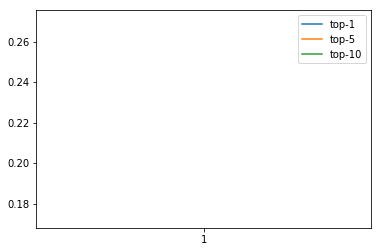

checkpoint =  77600
checkpoint =  77600
29610
2961
beam match =  True
top-1 0.17156366092536304
top-5 0.24282337048294494
top-10 0.26646403242147926


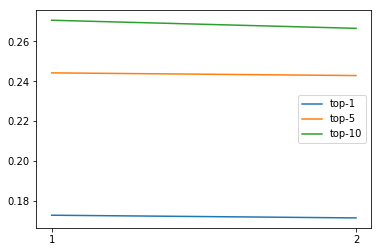

checkpoint =  78400
checkpoint =  78400
29610
2961
beam match =  True
top-1 0.17426545086119555
top-5 0.24214792299898683
top-10 0.2678149273893955


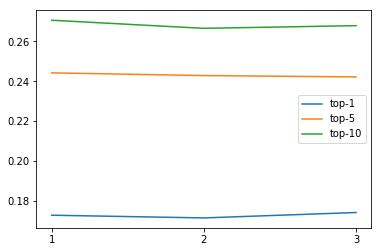

checkpoint =  79200
checkpoint =  79200
29610
2961
beam match =  True
top-1 0.16818642350557245
top-5 0.24518743667679838
top-10 0.2701789935832489


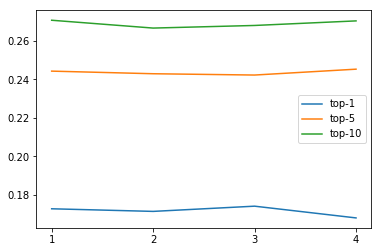

checkpoint =  80000
checkpoint =  80000
29610
2961
beam match =  True
top-1 0.1746031746031746
top-5 0.2424856467409659
top-10 0.270854441067207


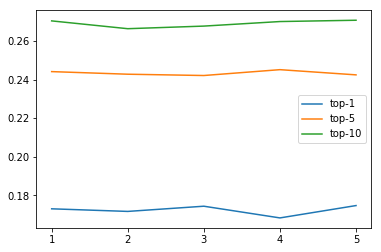

checkpoint =  80800
checkpoint =  80800
29610
2961
beam match =  True
top-1 0.17426545086119555
top-5 0.2468760553866937
top-10 0.27321850726106045


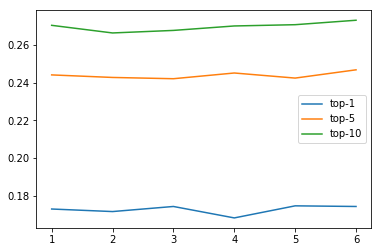

checkpoint =  81600
checkpoint =  81600
29610
2961
beam match =  True
top-1 0.17325227963525835
top-5 0.24316109422492402
top-10 0.270854441067207


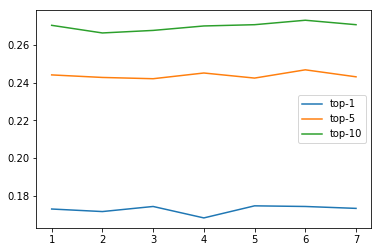

checkpoint =  82400
checkpoint =  82400
29610
2961
beam match =  True
top-1 0.1752786220871327
top-5 0.24417426545086118
top-10 0.27152988855116517


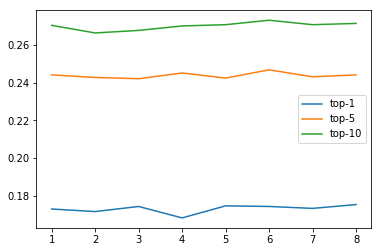

checkpoint =  83200
checkpoint =  83200
29610
2961
beam match =  True
top-1 0.1752786220871327
top-5 0.24822695035460993
top-10 0.27220533603512326


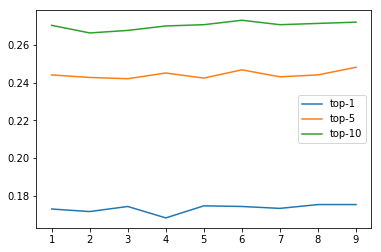

checkpoint =  84000
checkpoint =  84000
29610
2961
beam match =  True
top-1 0.17392772711921647
top-5 0.24214792299898683
top-10 0.2698412698412698


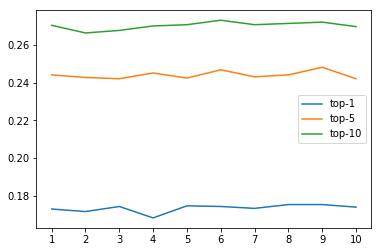

checkpoint =  84800
checkpoint =  84800
29610
2961
beam match =  True
top-1 0.17696724079702802
top-5 0.24282337048294494
top-10 0.27423167848699764


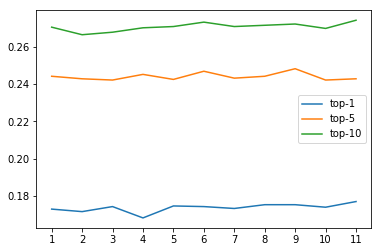

checkpoint =  85600
checkpoint =  85600
29610
2961
beam match =  True
top-1 0.17595406957109086
top-5 0.24214792299898683
top-10 0.26916582235731173


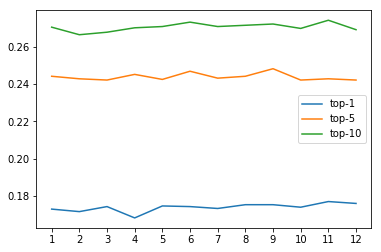

checkpoint =  86400
checkpoint =  86400
29610
2961
beam match =  True
top-1 0.1729145558932793
top-5 0.2404593042890915
top-10 0.2674772036474164


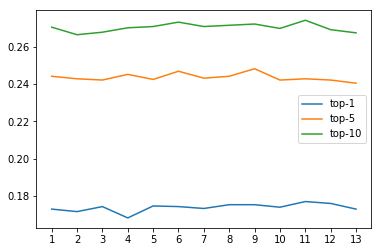

checkpoint =  87200
checkpoint =  87200
29610
2961
beam match =  True
top-1 0.1773049645390071
top-5 0.24788922661263088
top-10 0.27828436339074636


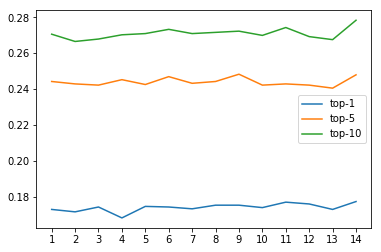

checkpoint =  88000
checkpoint =  88000
29610
2961
beam match =  True
top-1 0.17764268828098614
top-5 0.24349881796690306
top-10 0.2765957446808511


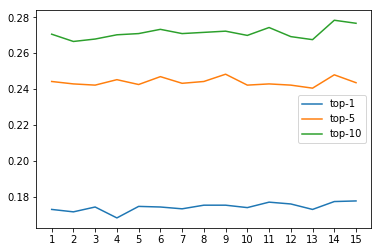

checkpoint =  88800
checkpoint =  88800
29610
2961
beam match =  True
top-1 0.1773049645390071
top-5 0.24214792299898683
top-10 0.26916582235731173


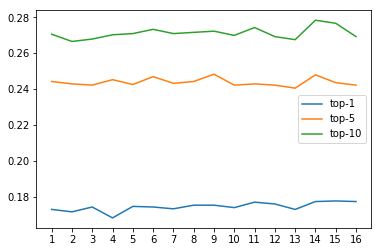

checkpoint =  89600
checkpoint =  89600
29610
2961
beam match =  True
top-1 0.1756163458291118
top-5 0.248564674096589
top-10 0.2799729821006417


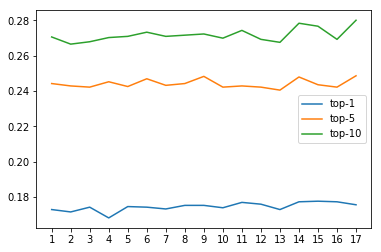

checkpoint =  90400
checkpoint =  90400
29610
2961
beam match =  True
top-1 0.1752786220871327
top-5 0.23877068557919623
top-10 0.2668017561634583


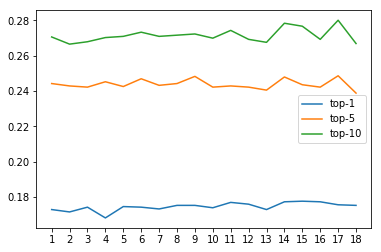

checkpoint =  91200
checkpoint =  91200
29610
2961
beam match =  True
top-1 0.1773049645390071
top-5 0.24181019925700778
top-10 0.2725430597771023


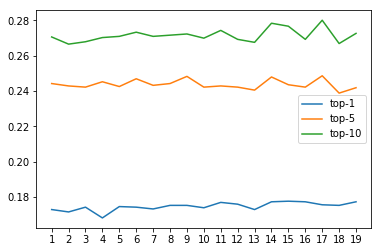

checkpoint =  92000
checkpoint =  92000
29610
2961
beam match =  True
top-1 0.17494089834515367
top-5 0.2397838568051334
top-10 0.2718676122931442


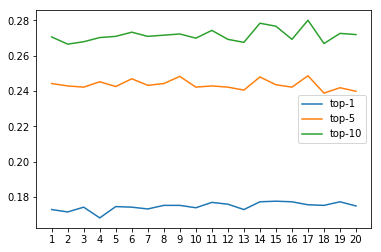

checkpoint =  92800
checkpoint =  92800
29610
2961
beam match =  True
top-1 0.1762917933130699
top-5 0.24383654170888214
top-10 0.2745694022289767


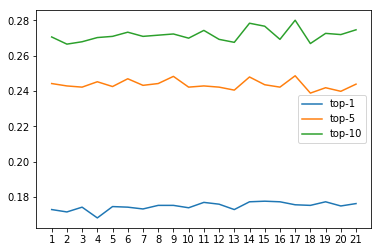

checkpoint =  93600
checkpoint =  93600
29610
2961
beam match =  True
top-1 0.1756163458291118
top-5 0.2424856467409659
top-10 0.27119216480918606


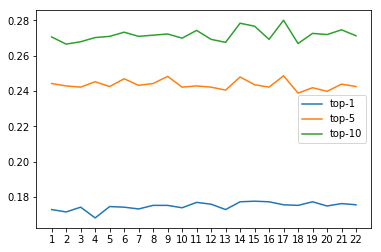

checkpoint =  94400
checkpoint =  94400
29610
2961
beam match =  True
top-1 0.17662951705504898
top-5 0.24214792299898683
top-10 0.27220533603512326


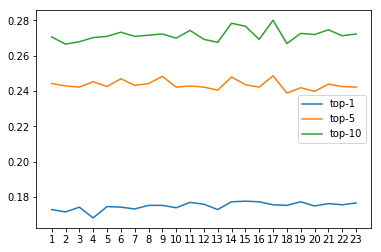

checkpoint =  95200
checkpoint =  95200
29610
2961
beam match =  True
top-1 0.17392772711921647
top-5 0.2458628841607565
top-10 0.27490712597095573


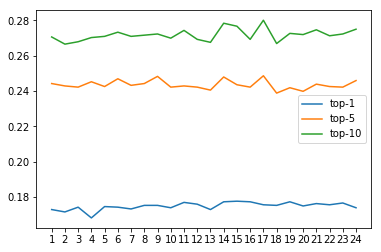

checkpoint =  96000
checkpoint =  96000
29610
2961
beam match =  True
top-1 0.17595406957109086
top-5 0.24113475177304963
top-10 0.2695035460992908


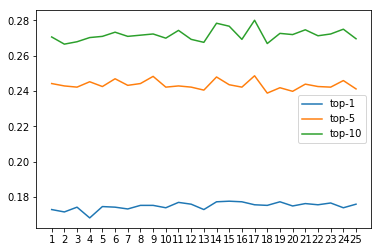

checkpoint =  96800
checkpoint =  96800
29610
2961
beam match =  True
top-1 0.1762917933130699
top-5 0.248564674096589
top-10 0.27760891590678827


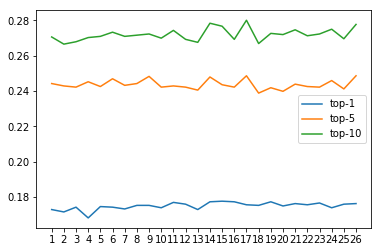

checkpoint =  97600
checkpoint =  97600
29610
2961
beam match =  True
top-1 0.17595406957109086
top-5 0.24721377912867273
top-10 0.27625802093887203


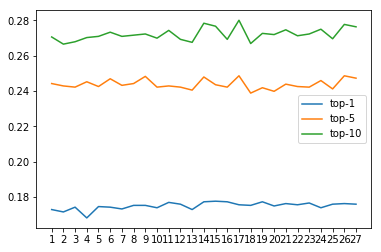

checkpoint =  98400
checkpoint =  98400
29610
2961
beam match =  True
top-1 0.17798041202296522
top-5 0.2458628841607565
top-10 0.27625802093887203


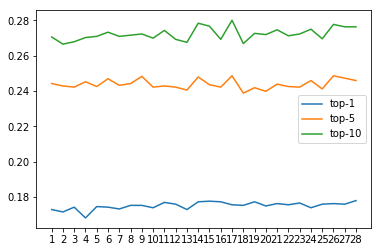

checkpoint =  99200
checkpoint =  99200
29610
2961
beam match =  True
top-1 0.1752786220871327
top-5 0.2475515028706518
top-10 0.2765957446808511


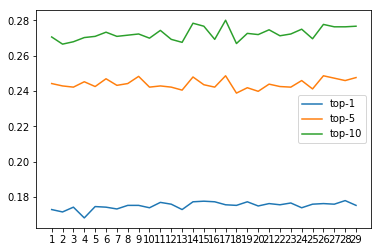

checkpoint =  100000
checkpoint =  100000
29610
2961
beam match =  True
top-1 0.17595406957109086
top-5 0.24417426545086118
top-10 0.2735562310030395


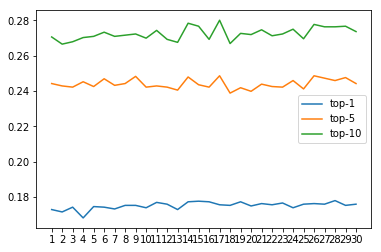

checkpoint =  100800
checkpoint =  100800
29610
2961
beam match =  True
top-1 0.17595406957109086
top-5 0.24552516041877745
top-10 0.27524484971293484


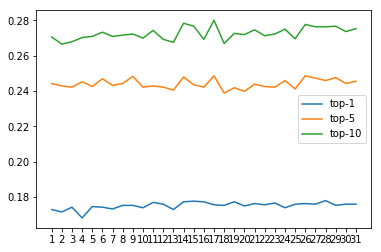

checkpoint =  101600
checkpoint =  101600
29610
2961
beam match =  True
top-1 0.17696724079702802
top-5 0.24518743667679838
top-10 0.27321850726106045


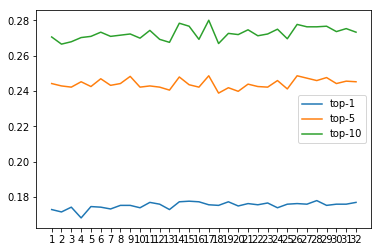

checkpoint =  102400
checkpoint =  102400
29610
2961
beam match =  True
top-1 0.17662951705504898
top-5 0.24282337048294494
top-10 0.2738939547450186


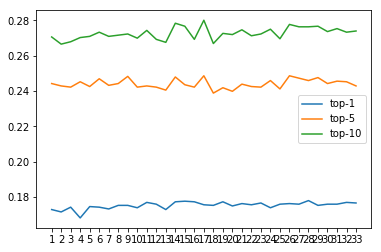

checkpoint =  103200
checkpoint =  103200
29610
2961
beam match =  True
top-1 0.17494089834515367
top-5 0.24214792299898683
top-10 0.2725430597771023


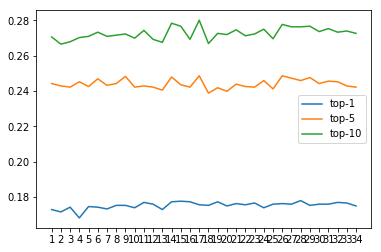

checkpoint =  104000
checkpoint =  104000
29610
2961
beam match =  True
top-1 0.17696724079702802
top-5 0.24991556906450524
top-10 0.28132387706855794


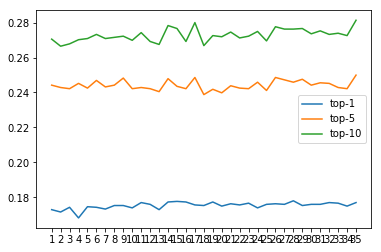

checkpoint =  104800
checkpoint =  104800
29610
2961
beam match =  True
top-1 0.1746031746031746
top-5 0.24653833164471461
top-10 0.2759202971968929


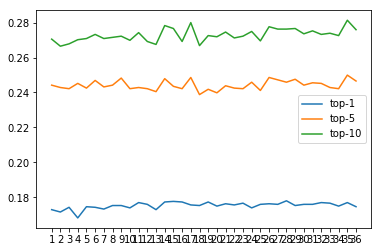

checkpoint =  105600
checkpoint =  105600
29610
2961
beam match =  True
top-1 0.17831813576494426
top-5 0.2512664640324215
top-10 0.27727119216480917


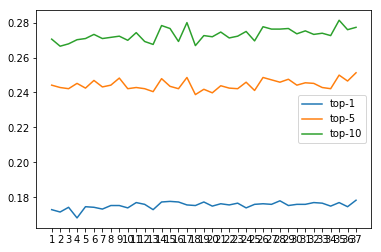

checkpoint =  106400
checkpoint =  106400
29610
2961
beam match =  True
top-1 0.17426545086119555
top-5 0.24383654170888214
top-10 0.27625802093887203


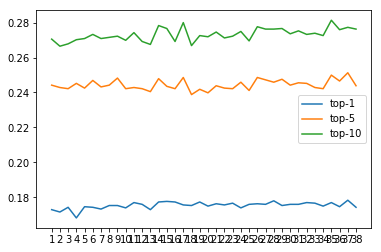

checkpoint =  107200
checkpoint =  107200
29610
2961
beam match =  True
top-1 0.17696724079702802
top-5 0.24383654170888214
top-10 0.2728807835190814


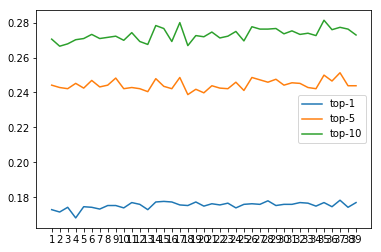

checkpoint =  108000
checkpoint =  108000
29610
2961
beam match =  True
top-1 0.17595406957109086
top-5 0.24518743667679838
top-10 0.27321850726106045


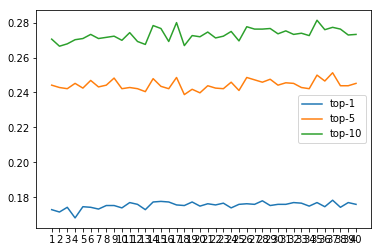

checkpoint =  108800
checkpoint =  108800
29610
2961
beam match =  True
top-1 0.17595406957109086
top-5 0.24451198919284026
top-10 0.2735562310030395


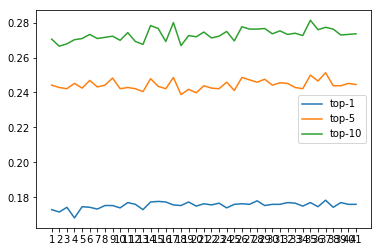

checkpoint =  109600
checkpoint =  109600
29610
2961
beam match =  True
top-1 0.1756163458291118
top-5 0.24417426545086118
top-10 0.2755825734549139


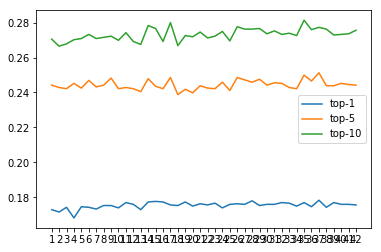

checkpoint =  110400
checkpoint =  110400
29610
2961
beam match =  True
top-1 0.17494089834515367
top-5 0.24451198919284026
top-10 0.27220533603512326


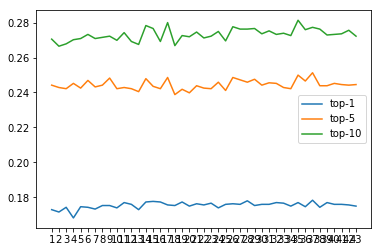

checkpoint =  111200
checkpoint =  111200
29610
2961
beam match =  True
top-1 0.1756163458291118
top-5 0.2414724755150287
top-10 0.26916582235731173


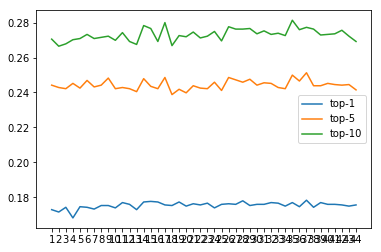

checkpoint =  112000
checkpoint =  112000
29610
2961
beam match =  True
top-1 0.1746031746031746
top-5 0.24214792299898683
top-10 0.2701789935832489


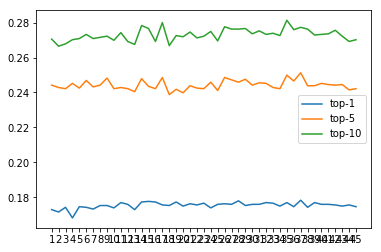

checkpoint =  112800
checkpoint =  112800
29610
2961
beam match =  True
top-1 0.17392772711921647
top-5 0.2424856467409659
top-10 0.27152988855116517


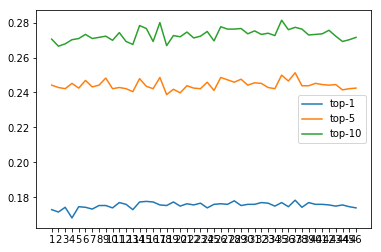

checkpoint =  113600
checkpoint =  113600
29610
2961
beam match =  True
top-1 0.1746031746031746
top-5 0.24349881796690306
top-10 0.2728807835190814


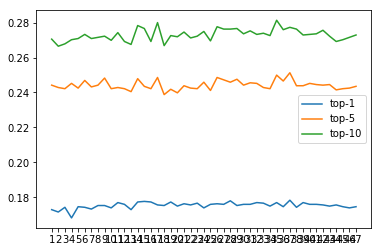

checkpoint =  114400
checkpoint =  114400
29610
2961
beam match =  True
top-1 0.17392772711921647
top-5 0.24484971293481933
top-10 0.2735562310030395


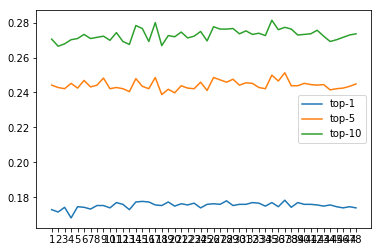

checkpoint =  115200
checkpoint =  115200
29610
2961
beam match =  True
top-1 0.17325227963525835
top-5 0.24484971293481933
top-10 0.2728807835190814


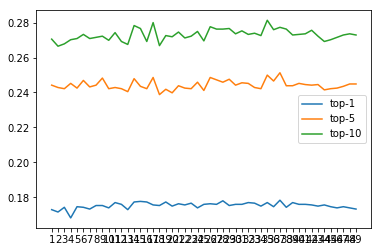

checkpoint =  116000
checkpoint =  116000
29610
2961
beam match =  True
top-1 0.1746031746031746
top-5 0.24552516041877745
top-10 0.27524484971293484


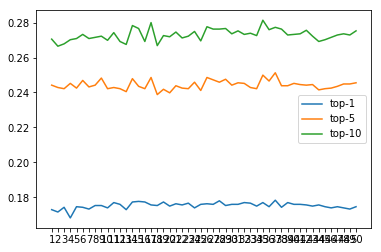

In [2]:
import matplotlib.pyplot as plt
from os import path
%matplotlib inline

top_1 = []
top_5 = []
top_10 = []
x_axis = []
cnt= 0
#preprocessed_cc_pointer_gen_without_space_step_800.pt
for cp in range(76800,116800,800):
    #cp = 163200
    checkpoint_number = cp
    cnt+=1
    print("checkpoint = ", cp)
    print("checkpoint = ", cp)
    model_name = 'trained_model_400_100_double_layer_and_embedding_76000/trained_model_400_100_base'
    out_file = 'trained_model_400_100_double_layer_and_embedding'+"out-{}.txt".format(checkpoint_number)
    checkpoint = model_name+"_step_{}.pt".format(checkpoint_number)
    #print("######### ", path.exists("output/c/"+out_file))
    if not path.exists("output/c/"+out_file):
        !onmt_translate -gpu 0 \
                   -batch_size 120 \
                   -model models/c/$checkpoint \
                   -src ../c_raw_data/c/src-test.txt \
                   -output output/c/$out_file \
                   -max_length 100 \
                   -stepwise_penalty \
                   -beta 5 \
                   -length_penalty wu \
                   -alpha 0.9 \
                   -replace_unk \
                   -block_ngram_repeat 3 \
                   -ignore_when_blocking "." "</t>" "<t>" \
                   -n_best 10 \
                   -beam_size 10

    pred = open('output/c/'+out_file, 'r', encoding= 'utf-8').read()
    tgt = open('c_raw_data/c/tgt-test.txt', 'r', encoding= 'utf-8').read()

    beam_size = 10
    preds = pred.split('\n')[:-1]
    tgts = tgt.split('\n')[:-1]
    print(len(preds))
    print(len(tgts))
    print("beam match = ", len(preds)== len(tgts)*beam_size)

    correct_1 = 0
    correct_5 = 0
    correct_10 = 0
    for i in range(len(tgts)):
        min_dis = 10000
        match_idx = -1
        #if "<|del|> <|nl|>" in tgt_train[i]:
        #    del_total+=1
        for j in range(10):
            if(tgts[i]==preds[i*beam_size+j]):
                if j <=0:
                    correct_1 +=1
                if j <=4:
                    correct_5 +=1
                if j <=9:
                    correct_10 +=1
    print("top-1", correct_1/len(tgts))
    print("top-5",correct_5/len(tgts))
    print("top-10",correct_10/len(tgts))
    x_axis.append(cnt)
    top_1.append(correct_1/len(tgts))
    top_5.append(correct_5/len(tgts))
    top_10.append(correct_10/len(tgts))
    
    plt.plot(x_axis,top_1, label='top-1')
    plt.plot(x_axis,top_5, label='top-5')
    plt.plot(x_axis,top_10, label='top-10')
    plt.legend()
    plt.xticks(x_axis)
    plt.show()

    
'''
best
checkpoint =  104000
top-1 0.17696724079702802
top-5 0.24991556906450524
top-10 0.28132387706855794
'''

# just training the big net and inferenceing to check is the result only for big size or funetuning 

In [ ]:
!onmt_train -data data/c/training_data \
            -save_model models/c/without_pretraining/double_layer_and_embedding_model \
            -batch_size 55 \
            -report_every 200 \
            -valid_steps 800 \
            -world_size 1 \
            -gpu_ranks 0 \
            -copy_attn -global_attention mlp \
            -word_vec_size 256 \
            -rnn_size 512 \
            -layers 2 \
            -encoder_type brnn \
            -train_steps 500000 \
            -max_grad_norm 2 \
            -dropout 0. \
            -optim adagrad \
            -learning_rate 0.15 \
            -adagrad_accumulator_init 0.1 \
            -reuse_copy_attn \
            -copy_loss_by_seqlength\
            -bridge \
            -seed 777 \
            -save_checkpoint_steps 800 \
            -keep_checkpoint 400 \
            -train_from models/c/without_pretraining/double_layer_and_embedding_model_step_35200.pt

[2020-03-27 08:57:31,738 INFO] Loading checkpoint from models/c/without_pretraining/double_layer_and_embedding_model_step_35200.pt
[2020-03-27 08:57:31,812 INFO] Loading vocab from checkpoint at models/c/without_pretraining/double_layer_and_embedding_model_step_35200.pt.
[2020-03-27 08:57:31,812 INFO]  * src vocab size = 2002
[2020-03-27 08:57:31,812 INFO]  * tgt vocab size = 2004
[2020-03-27 08:57:31,812 INFO] Building model...
[2020-03-27 08:57:34,027 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(2002, 256, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(256, 256, num_layers=2, bidirectional=True)
    (bridge): ModuleList(
      (0): Linear(in_features=512, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
   

[2020-03-27 11:18:09,229 INFO] number of examples: 2961
[2020-03-27 13:11:03,878 INFO] Step 43800/500000; acc:  87.80; ppl:  1.69; xent: 0.52; lr: 0.15000; 10883/908 tok/s;  15210 sec
[2020-03-27 13:16:37,309 INFO] Step 44000/500000; acc:  86.90; ppl:  1.77; xent: 0.57; lr: 0.15000; 10869/914 tok/s;  15543 sec
[2020-03-27 13:16:37,309 INFO] Loading dataset from data/c/training_data.valid.0.pt
[2020-03-27 13:16:37,816 INFO] number of examples: 2961
[2020-03-27 13:17:47,181 INFO] Validation perplexity: 3.61909
[2020-03-27 13:17:47,181 INFO] Validation accuracy: 77.0799
[2020-03-27 13:17:47,400 INFO] Saving checkpoint models/c/without_pretraining/double_layer_and_embedding_model_step_44000.pt
[2020-03-27 13:23:25,269 INFO] Step 44200/500000; acc:  86.79; ppl:  1.77; xent: 0.57; lr: 0.15000; 8424/722 tok/s;  15951 sec
[2020-03-27 13:29:10,752 INFO] Step 44400/500000; acc:  87.64; ppl:  1.70; xent: 0.53; lr: 0.15000; 10053/891 tok/s;  16297 sec
[2020-03-27 13:29:23,783 INFO] Loading dataset

[2020-03-27 16:26:31,272 INFO] Step 50400/500000; acc:  88.90; ppl:  1.61; xent: 0.48; lr: 0.07500; 10136/897 tok/s;  26937 sec
[2020-03-27 16:26:31,274 INFO] Loading dataset from data/c/training_data.valid.0.pt
[2020-03-27 16:26:31,778 INFO] number of examples: 2961
[2020-03-27 16:27:41,074 INFO] Validation perplexity: 3.69143
[2020-03-27 16:27:41,075 INFO] Validation accuracy: 77.4579
[2020-03-27 16:27:41,312 INFO] Saving checkpoint models/c/without_pretraining/double_layer_and_embedding_model_step_50400.pt
[2020-03-27 16:31:51,607 INFO] Loading dataset from data/c/training_data.train.0.pt
[2020-03-27 16:32:13,217 INFO] number of examples: 56211
[2020-03-27 16:33:59,093 INFO] Step 50600/500000; acc:  89.48; ppl:  1.57; xent: 0.45; lr: 0.07500; 7674/700 tok/s;  27385 sec
[2020-03-27 16:39:19,939 INFO] Step 50800/500000; acc:  90.68; ppl:  1.49; xent: 0.40; lr: 0.07500; 10743/913 tok/s;  27706 sec
[2020-03-27 16:44:36,544 INFO] Step 51000/500000; acc:  90.94; ppl:  1.47; xent: 0.39; lr

checkpoint =  800
29610
2961
beam match =  True
top-1 0.06011482607227288
top-5 0.15332657885849374
top-10 0.1540020263424519


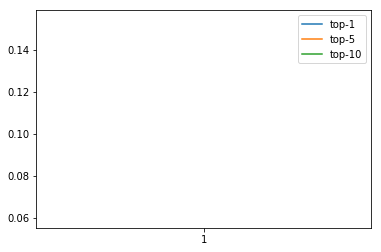

checkpoint =  1600
29610
2961
beam match =  True
top-1 0.14353259034110097
top-5 0.1540020263424519
top-10 0.15467747382641


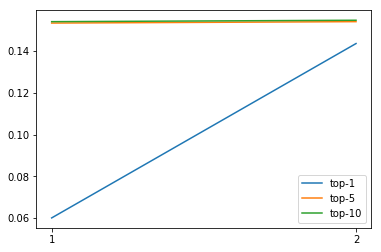

checkpoint =  2400
29610
2961
beam match =  True
top-1 0.14826072272880783
top-5 0.16041877744005403
top-10 0.1668355285376562


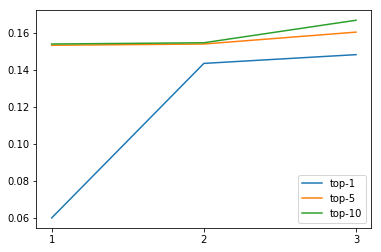

checkpoint =  3200
29610
2961
beam match =  True
top-1 0.11685241472475515
top-5 0.16751097602161433
top-10 0.1729145558932793


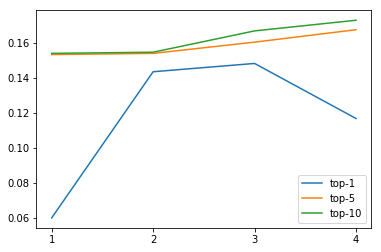

checkpoint =  4000
29610
2961
beam match =  True
top-1 0.14353259034110097
top-5 0.17392772711921647
top-10 0.18743667679837892


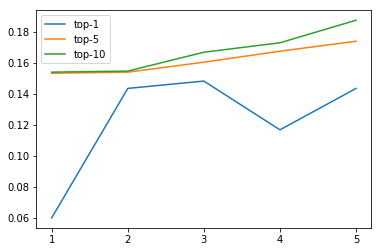

checkpoint =  4800
29610
2961
beam match =  True
top-1 0.1469098277608916
top-5 0.17494089834515367
top-10 0.18811212428233706


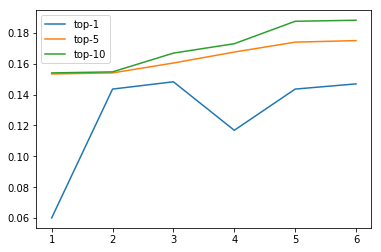

checkpoint =  5600
29610
2961
beam match =  True
top-1 0.1354272205336035
top-5 0.17831813576494426
top-10 0.1938534278959811


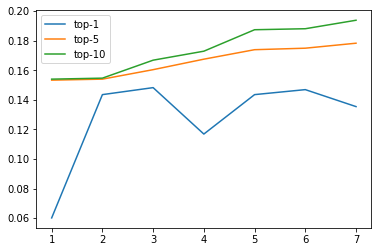

checkpoint =  6400
29610
2961
beam match =  True
top-1 0.13779128672745694
top-5 0.17865585950692334
top-10 0.18878757176629518


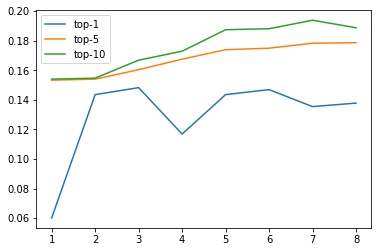

checkpoint =  7200
29610
2961
beam match =  True
top-1 0.1425194191151638
top-5 0.18405943937858832
top-10 0.20398514015535293


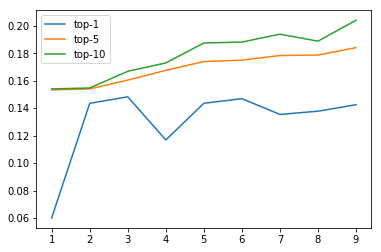

checkpoint =  8000
29610
2961
beam match =  True
top-1 0.14826072272880783
top-5 0.187774400540358
top-10 0.2077001013171226


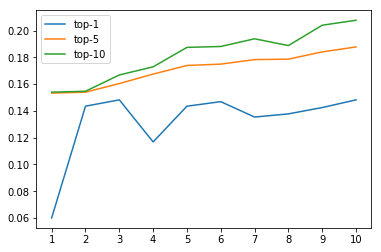

checkpoint =  8800
29610
2961
beam match =  True
top-1 0.1485984464707869
top-5 0.18743667679837892
top-10 0.20229652144545762


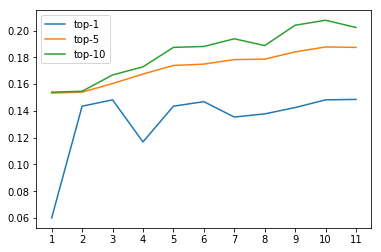

checkpoint =  9600
29610
2961
beam match =  True
top-1 0.15062478892266126
top-5 0.19081391421816954
top-10 0.20871327254305977


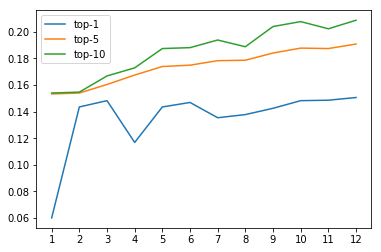

checkpoint =  10400
29610
2961
beam match =  True
top-1 0.1502870651806822
top-5 0.19047619047619047
top-10 0.2110773387369132


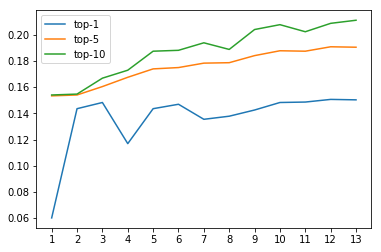

checkpoint =  11200
29610
2961
beam match =  True
top-1 0.13610266801756163
top-5 0.18642350557244175
top-10 0.20837554880108072


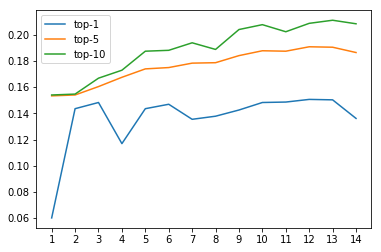

checkpoint =  12000
29610
2961
beam match =  True
top-1 0.1540020263424519
top-5 0.19486659912191828
top-10 0.2171563660925363


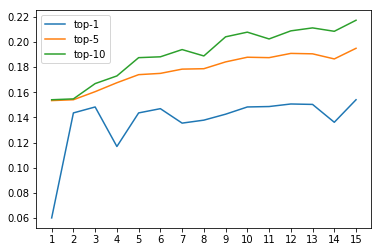

checkpoint =  12800
29610
2961
beam match =  True
top-1 0.15433975008443093
top-5 0.19824383654170888
top-10 0.2171563660925363


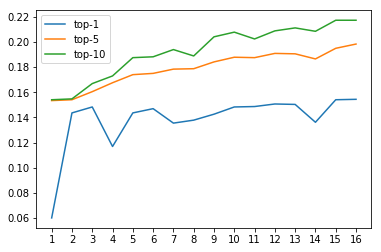

checkpoint =  13600
29610
2961
beam match =  True
top-1 0.1519756838905775
top-5 0.19486659912191828
top-10 0.21648091860857818


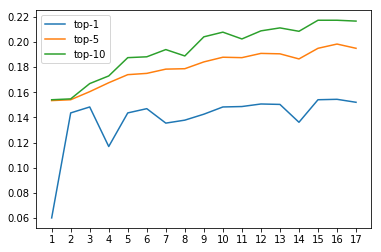

checkpoint =  14400
29610
2961
beam match =  True
top-1 0.1458966565349544
top-5 0.19182708544410673
top-10 0.21648091860857818


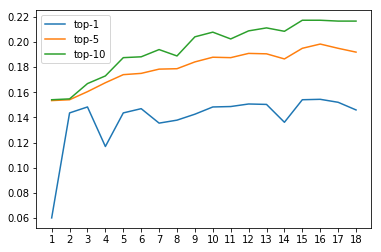

checkpoint =  15200
29610
2961
beam match =  True
top-1 0.15163796014859846
top-5 0.19756838905775076
top-10 0.2181695373184735


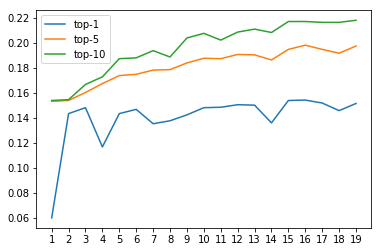

checkpoint =  16000
29610
2961
beam match =  True
top-1 0.14184397163120568
top-5 0.19689294157379264
top-10 0.22357311719013848


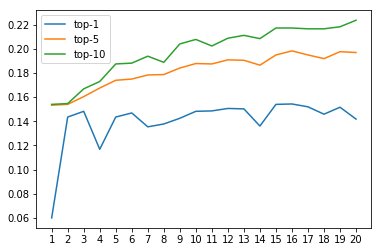

checkpoint =  16800
29610
2961
beam match =  True
top-1 0.14420803782505912
top-5 0.19621749408983452
top-10 0.2222222222222222


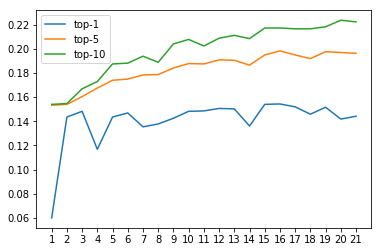

checkpoint =  17600
29610
2961
beam match =  True
top-1 0.13340087808172915
top-5 0.18574805808848363
top-10 0.21073961499493415


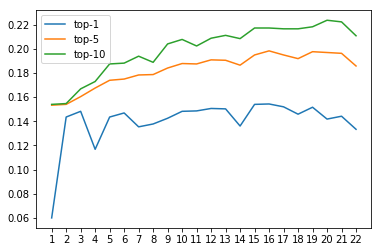

checkpoint =  18400
29610
2961
beam match =  True
top-1 0.12563323201621074
top-5 0.1867612293144208
top-10 0.22188449848024316


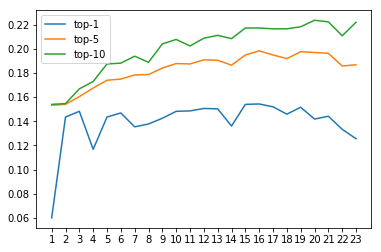

checkpoint =  19200
29610
2961
beam match =  True
top-1 0.13880445795339413
top-5 0.18878757176629518
top-10 0.21783181357649442


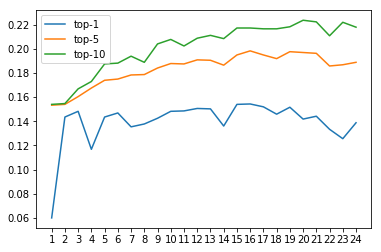

checkpoint =  20000
29610
2961
beam match =  True
top-1 0.14353259034110097
top-5 0.19419115163796014
top-10 0.22289766970618036


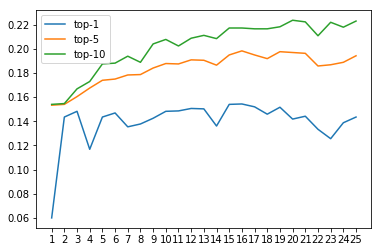

checkpoint =  20800
29610
2961
beam match =  True
top-1 0.160081053698075
top-5 0.2016210739614995
top-10 0.21952043228638973


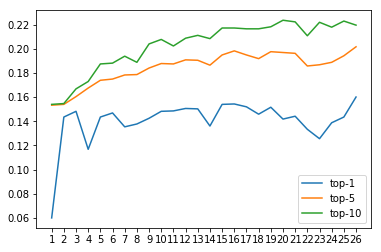

checkpoint =  21600
29610
2961
beam match =  True
top-1 0.14792299898682879
top-5 0.19216480918608578
top-10 0.20871327254305977


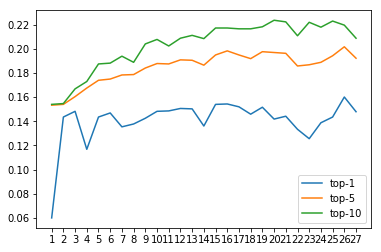

checkpoint =  22400
29610
2961
beam match =  True
top-1 0.13846673421141506
top-5 0.19047619047619047
top-10 0.21749408983451538


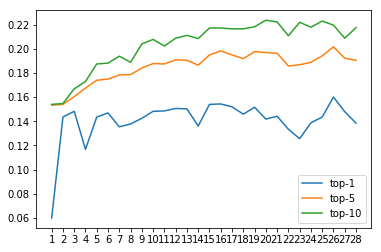

checkpoint =  23200
29610
2961
beam match =  True
top-1 0.15737926376224248
top-5 0.19723066531577169
top-10 0.21850726106045254


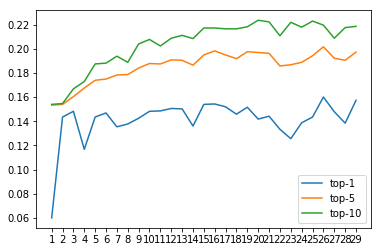

checkpoint =  24000
29610
2961
beam match =  True
top-1 0.1485984464707869
top-5 0.1894630192502533
top-10 0.2171563660925363


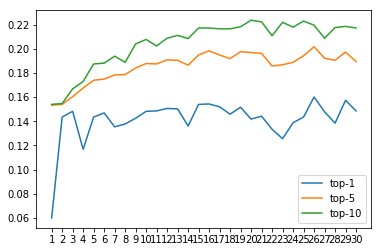

checkpoint =  24800
29610
2961
beam match =  True
top-1 0.15096251266464034
top-5 0.19419115163796014
top-10 0.21040189125295508


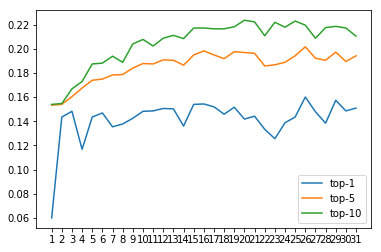

checkpoint =  25600
29610
2961
beam match =  True
top-1 0.1347517730496454
top-5 0.1894630192502533
top-10 0.22019587977034785


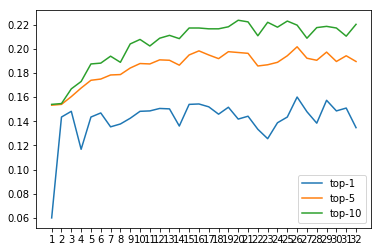

checkpoint =  26400
29610
2961
beam match =  True
top-1 0.13711583924349882
top-5 0.1806822019587977
top-10 0.21040189125295508


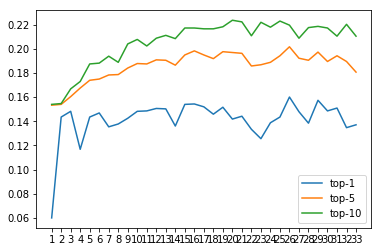

checkpoint =  27200
29610
2961
beam match =  True
top-1 0.13677811550151975
top-5 0.1850726106045255
top-10 0.20905099628503884


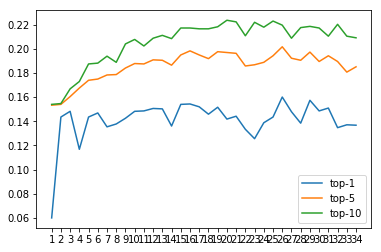

checkpoint =  28000
29610
2961
beam match =  True
top-1 0.13779128672745694
top-5 0.1850726106045255
top-10 0.21175278622087132


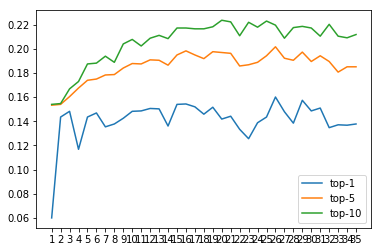

checkpoint =  28800
29610
2961
beam match =  True
top-1 0.14420803782505912
top-5 0.1867612293144208
top-10 0.21073961499493415


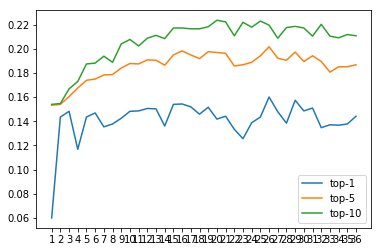

checkpoint =  29600
29610
2961
beam match =  True
top-1 0.1475852752448497
top-5 0.18811212428233706
top-10 0.21006416751097604


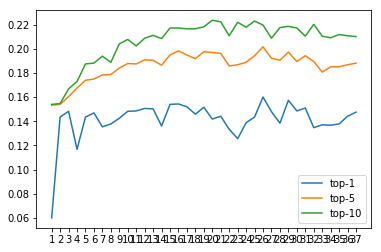

checkpoint =  30400
29610
2961
beam match =  True
top-1 0.1286727456940223
top-5 0.17156366092536304
top-10 0.20229652144545762


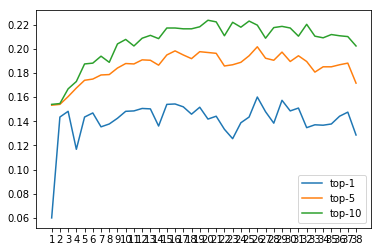

checkpoint =  31200
29610
2961
beam match =  True
top-1 0.12698412698412698
top-5 0.16987504221546776
top-10 0.1999324552516042


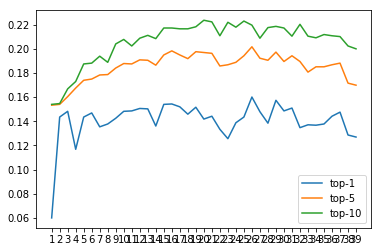

checkpoint =  32000
29610
2961
beam match =  True
top-1 0.14961161769672407
top-5 0.18980074299223235
top-10 0.21411685241472475


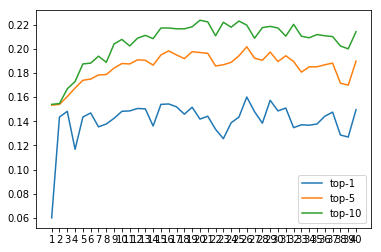

checkpoint =  32800
29610
2961
beam match =  True
top-1 0.11313745356298548
top-5 0.16210739614994935
top-10 0.19250253292806485


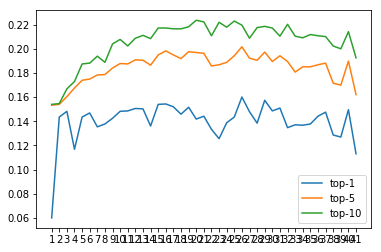

checkpoint =  33600
29610
2961
beam match =  True
top-1 0.14623438027693347
top-5 0.19081391421816954
top-10 0.20736237757514353


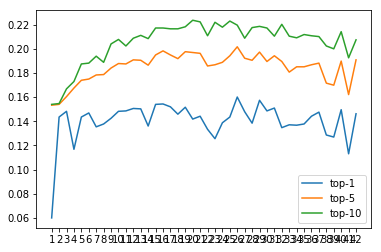

checkpoint =  34400
29610
2961
beam match =  True
top-1 0.13914218169537318
top-5 0.17798041202296522
top-10 0.19824383654170888


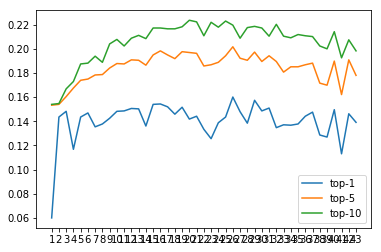

checkpoint =  35200
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 01:47:15,952 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0315, PRED PPL: 1.0320
29610
2961
beam match =  True
top-1 0.1475852752448497
top-5 0.18709895305639987
top-10 0.21175278622087132


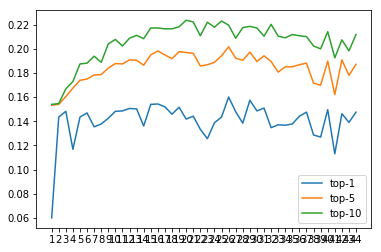

checkpoint =  36000
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 01:54:35,905 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0334, PRED PPL: 1.0340
29610
2961
beam match =  True
top-1 0.13137453562985477
top-5 0.1685241472475515
top-10 0.19621749408983452


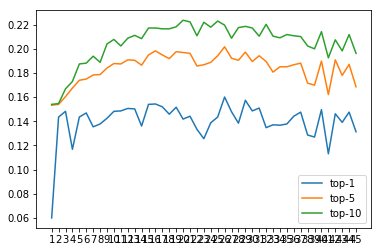

checkpoint =  36800
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 02:02:27,246 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0300, PRED PPL: 1.0305
29610
2961
beam match =  True
top-1 0.14353259034110097
top-5 0.18405943937858832
top-10 0.20837554880108072


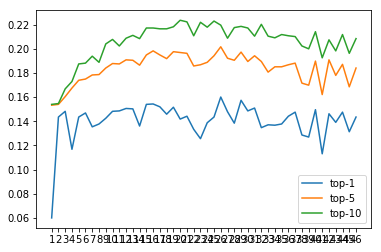

checkpoint =  37600
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 02:09:51,973 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0290, PRED PPL: 1.0295
29610
2961
beam match =  True
top-1 0.12529550827423167
top-5 0.15940560621411684
top-10 0.19013846673421142


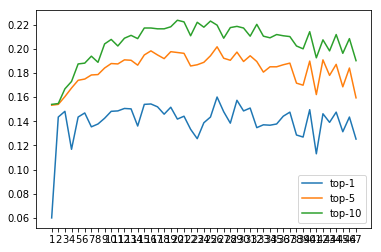

checkpoint =  38400
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 02:17:15,008 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0291, PRED PPL: 1.0296
29610
2961
beam match =  True
top-1 0.10503208375548802
top-5 0.14488348530901723
top-10 0.17426545086119555


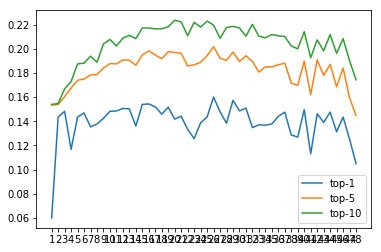

checkpoint =  39200
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 02:24:49,760 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0299, PRED PPL: 1.0303
29610
2961
beam match =  True
top-1 0.12529550827423167
top-5 0.15974332995609591
top-10 0.18574805808848363


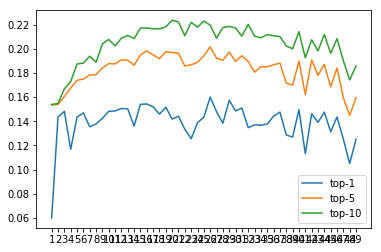

checkpoint =  40000
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 02:32:35,877 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0336, PRED PPL: 1.0341
29610
2961
beam match =  True
top-1 0.1303613644039176
top-5 0.16649780479567713
top-10 0.19587977034785545


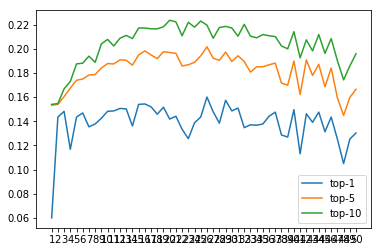

checkpoint =  40800
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 02:40:20,931 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0308, PRED PPL: 1.0313
29610
2961
beam match =  True
top-1 0.10266801756163459
top-5 0.13947990543735225
top-10 0.1702127659574468


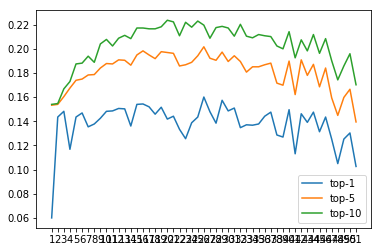

checkpoint =  41600
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 02:47:59,918 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0291, PRED PPL: 1.0296
29610
2961
beam match =  True
top-1 0.11921648091860858
top-5 0.1536643026004728
top-10 0.18101992570077677


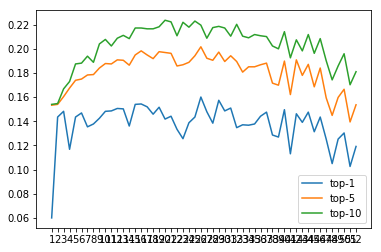

checkpoint =  42400
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 02:54:45,196 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0321, PRED PPL: 1.0326
29610
2961
beam match =  True
top-1 0.1171901384667342
top-5 0.1540020263424519
top-10 0.18270854441067208


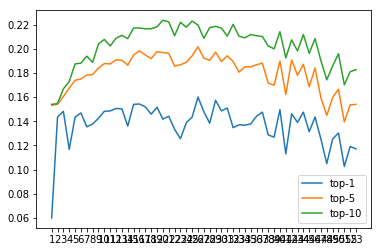

checkpoint =  43200
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 03:02:29,160 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0299, PRED PPL: 1.0303
29610
2961
beam match =  True
top-1 0.13103681188787572
top-5 0.16345829111786558
top-10 0.19047619047619047


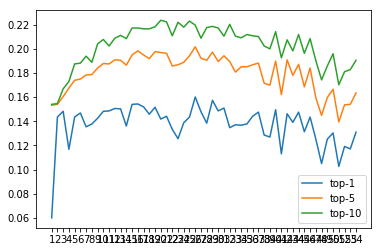

checkpoint =  44000
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 03:10:23,869 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0281, PRED PPL: 1.0285
29610
2961
beam match =  True
top-1 0.1408308004052685
top-5 0.18135764944275581
top-10 0.20263424518743667


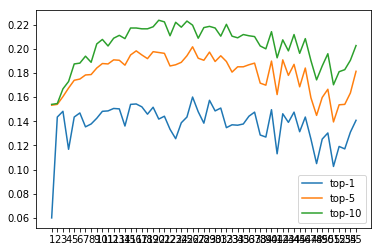

checkpoint =  44800
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 03:17:12,702 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0315, PRED PPL: 1.0320
29610
2961
beam match =  True
top-1 0.1242823370482945
top-5 0.15771698750422156
top-10 0.18878757176629518


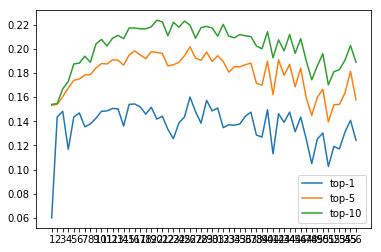

checkpoint =  45600
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 03:24:42,329 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0284, PRED PPL: 1.0288
29610
2961
beam match =  True
top-1 0.12529550827423167
top-5 0.15670381627828436
top-10 0.1833839918946302


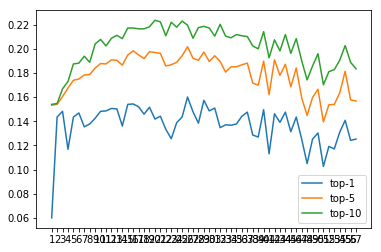

checkpoint =  46400
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 03:31:48,029 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0284, PRED PPL: 1.0288
29610
2961
beam match =  True
top-1 0.11482607227288079
top-5 0.14657210401891252
top-10 0.1816953731847349


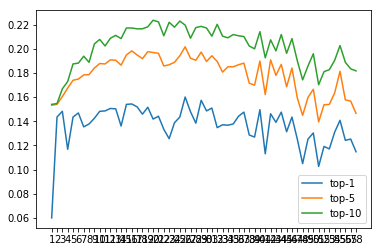

checkpoint =  47200
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 03:39:02,293 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0288, PRED PPL: 1.0292
29610
2961
beam match =  True
top-1 0.13407632556568727
top-5 0.16582235731171902
top-10 0.19148936170212766


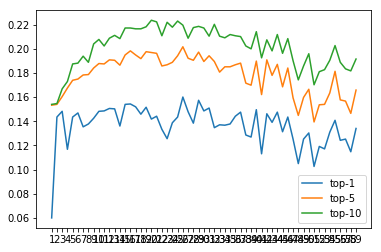

checkpoint =  48000
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 03:46:26,603 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0295, PRED PPL: 1.0299
29610
2961
beam match =  True
top-1 0.1303613644039176
top-5 0.1590678824721378
top-10 0.1833839918946302


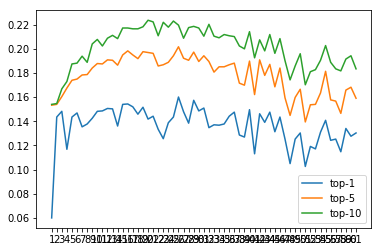

checkpoint =  49600
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 04:01:09,354 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0291, PRED PPL: 1.0295
29610
2961
beam match =  True
top-1 0.1094224924012158
top-5 0.14285714285714285
top-10 0.17190138466734212


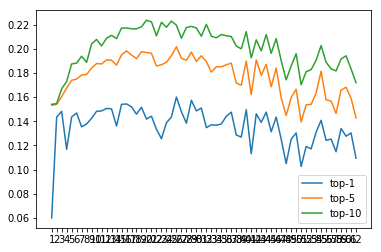

checkpoint =  50400
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 04:09:07,584 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0284, PRED PPL: 1.0288
29610
2961
beam match =  True
top-1 0.11415062478892266
top-5 0.14353259034110097
top-10 0.17392772711921647


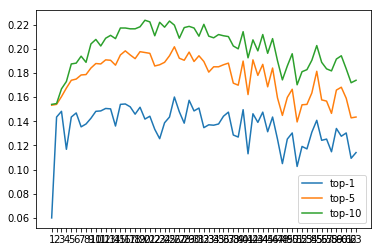

checkpoint =  51200
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 04:17:07,647 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0271, PRED PPL: 1.0275
29610
2961
beam match =  True
top-1 0.1077338736913205
top-5 0.14049307666328942
top-10 0.16818642350557245


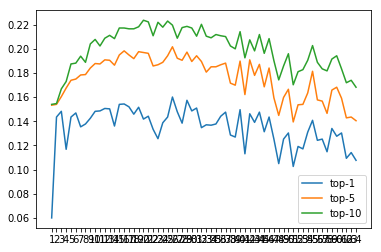

checkpoint =  52000
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 04:24:29,922 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0258, PRED PPL: 1.0261
29610
2961
beam match =  True
top-1 0.10976021614319487
top-5 0.14454576156703816
top-10 0.17223910840932116


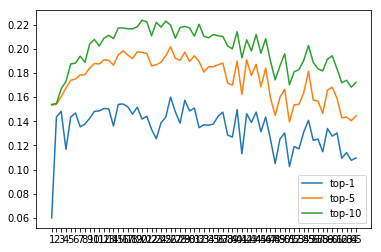

checkpoint =  52800
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 04:32:28,146 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0255, PRED PPL: 1.0259
29610
2961
beam match =  True
top-1 0.09523809523809523
top-5 0.11887875717662952
top-10 0.15163796014859846


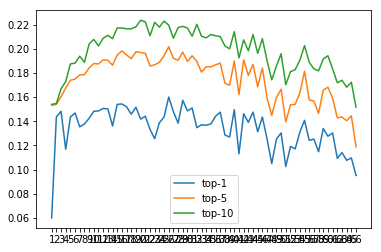

checkpoint =  53600
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 04:40:28,148 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0249, PRED PPL: 1.0252
29610
2961
beam match =  True
top-1 0.10233029381965553
top-5 0.13137453562985477
top-10 0.15704154002026344


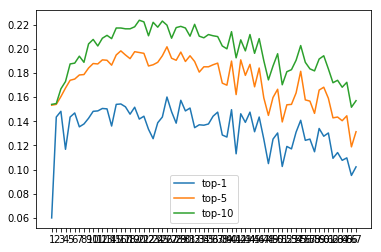

checkpoint =  54400
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 04:48:27,574 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0261, PRED PPL: 1.0264
29610
2961
beam match =  True
top-1 0.10233029381965553
top-5 0.12901046943600136
top-10 0.15231340763255657


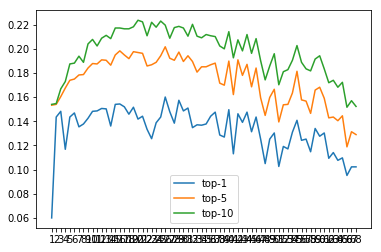

checkpoint =  55200
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 04:56:42,047 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0250, PRED PPL: 1.0254
29610
2961
beam match =  True
top-1 0.10131712259371833
top-5 0.12799729821006417
top-10 0.15501519756838905


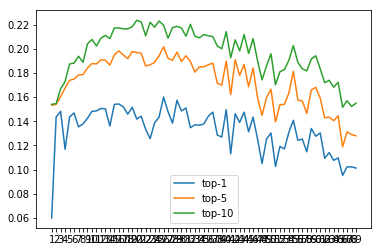

checkpoint =  56000
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 05:04:39,215 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0258, PRED PPL: 1.0261
29610
2961
beam match =  True
top-1 0.12225599459642013
top-5 0.15096251266464034
top-10 0.17392772711921647


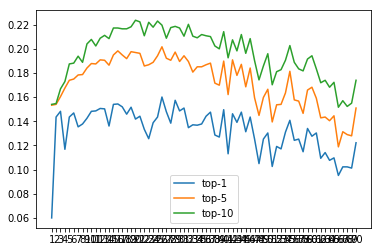

checkpoint =  56800
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 05:12:29,194 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0248, PRED PPL: 1.0252
29610
2961
beam match =  True
top-1 0.09186085781830462
top-5 0.11617696724079703
top-10 0.1415062478892266


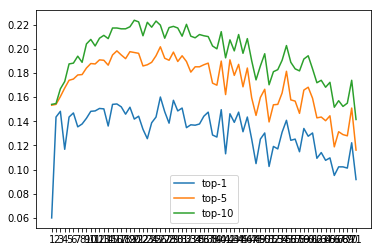

checkpoint =  57600
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 05:20:15,945 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0254, PRED PPL: 1.0257
29610
2961
beam match =  True
top-1 0.10435663627152988
top-5 0.13069908814589665
top-10 0.15737926376224248


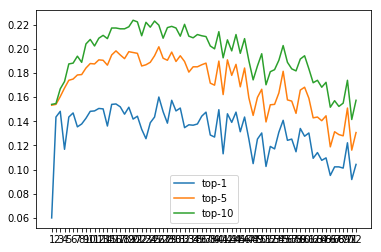

checkpoint =  58400
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 05:28:19,162 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0257, PRED PPL: 1.0260
29610
2961
beam match =  True
top-1 0.10874704491725769
top-5 0.13508949679162446
top-10 0.16109422492401215


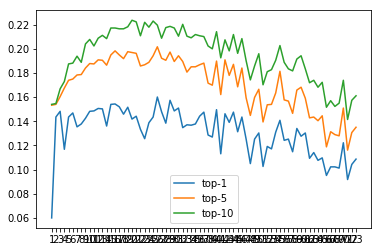

checkpoint =  59200
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 05:36:04,234 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0250, PRED PPL: 1.0253
29610
2961
beam match =  True
top-1 0.09456264775413711
top-5 0.11786558595069234
top-10 0.1425194191151638


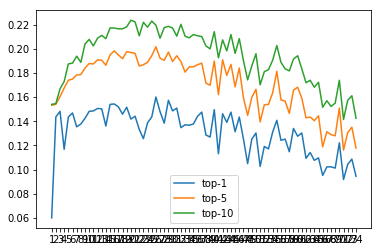

checkpoint =  60000
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 05:44:13,760 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0264, PRED PPL: 1.0267
29610
2961
beam match =  True
top-1 0.11482607227288079
top-5 0.13711583924349882
top-10 0.16210739614994935


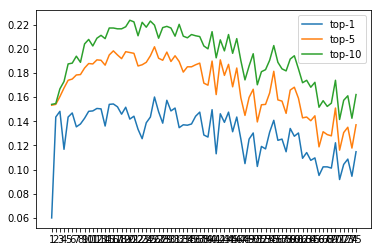

checkpoint =  60800
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 05:52:11,300 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0249, PRED PPL: 1.0252
29610
2961
beam match =  True
top-1 0.10469436001350894
top-5 0.13238770685579196
top-10 0.1590678824721378


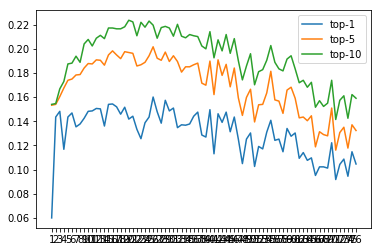

checkpoint =  61600
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 06:00:28,709 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0248, PRED PPL: 1.0251
29610
2961
beam match =  True
top-1 0.10368118878757177
top-5 0.1276595744680851
top-10 0.15332657885849374


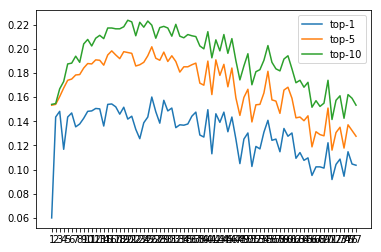

checkpoint =  62400
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 06:08:27,379 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0250, PRED PPL: 1.0253
29610
2961
beam match =  True
top-1 0.10368118878757177
top-5 0.1320499831138129
top-10 0.15467747382641


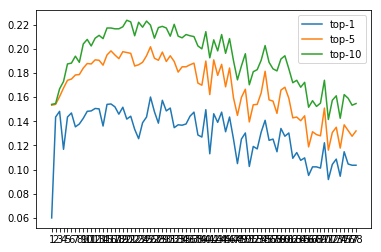

checkpoint =  63200
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 06:16:38,743 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0240, PRED PPL: 1.0243
29610
2961
beam match =  True
top-1 0.11347517730496454
top-5 0.14184397163120568
top-10 0.16345829111786558


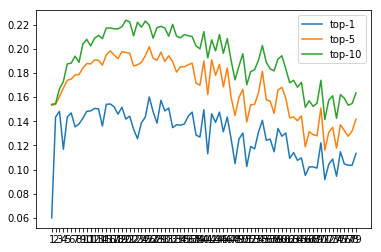

checkpoint =  64000
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 06:24:38,454 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0236, PRED PPL: 1.0238
29610
2961
beam match =  True
top-1 0.1060452549814252
top-5 0.1354272205336035
top-10 0.15974332995609591


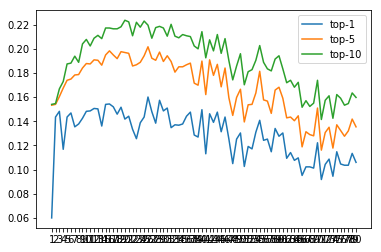

checkpoint =  64800
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 06:32:15,953 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0249, PRED PPL: 1.0252
29610
2961
beam match =  True
top-1 0.10300574130361365
top-5 0.12799729821006417
top-10 0.14792299898682879


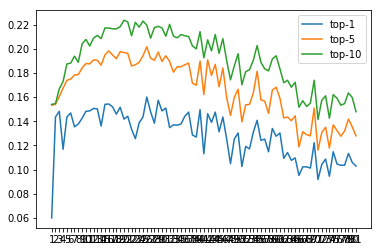

checkpoint =  65600
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 06:40:09,712 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0242, PRED PPL: 1.0245
29610
2961
beam match =  True
top-1 0.1033434650455927
top-5 0.12326916582235731
top-10 0.14657210401891252


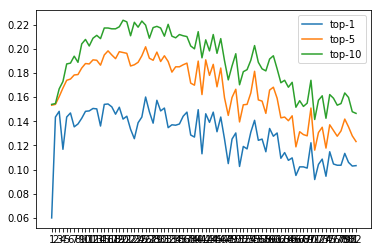

checkpoint =  66400
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 06:48:11,979 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0238, PRED PPL: 1.0241
29610
2961
beam match =  True
top-1 0.10368118878757177
top-5 0.12462006079027356
top-10 0.15231340763255657


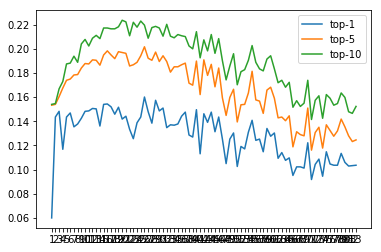

checkpoint =  67200
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 06:56:23,839 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0232, PRED PPL: 1.0235
29610
2961
beam match =  True
top-1 0.10097939885173927
top-5 0.1242823370482945
top-10 0.14488348530901723


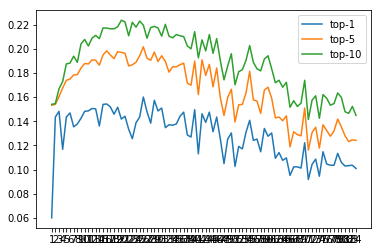

checkpoint =  68000
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-03-28 07:04:19,185 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0245, PRED PPL: 1.0248
29610
2961
beam match =  True
top-1 0.10368118878757177
top-5 0.12732185072610605
top-10 0.15130023640661938


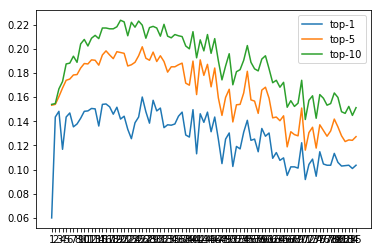

'\nbest\n\n'

In [ ]:
import matplotlib.pyplot as plt
from os import path
%matplotlib inline

top_1 = []
top_5 = []
top_10 = []
x_axis = []
cnt= 0
#preprocessed_cc_pointer_gen_without_space_step_800.pt
for cp in range(800,68800,800):
    #cp = 163200
    checkpoint_number = cp
    cnt+=1
    #print("checkpoint = ", cp)
    print("checkpoint = ", cp)
    model_name = 'without_pretraining/double_layer_and_embedding_model'
    out_file = 'without_pretraining_trained_model_400_100_double_layer_and_embedding_'+"out-{}.txt".format(checkpoint_number)
    checkpoint = model_name+"_step_{}.pt".format(checkpoint_number)
    #print("######### ", path.exists("output/c/"+out_file))
    if not path.exists("output/c/"+out_file):
        !onmt_translate -gpu 0 \
                   -batch_size 100 \
                   -model models/c/$checkpoint \
                   -src c_raw_data/c/src-test.txt \
                   -output output/c/$out_file \
                   -max_length 100 \
                   -stepwise_penalty \
                   -beta 5 \
                   -length_penalty wu \
                   -alpha 0.9 \
                   -replace_unk \
                   -block_ngram_repeat 3 \
                   -ignore_when_blocking "." "</t>" "<t>" \
                   -n_best 10 \
                   -beam_size 10

    pred = open('output/c/'+out_file, 'r', encoding= 'utf-8').read()
    tgt = open('c_raw_data/c/tgt-test.txt', 'r', encoding= 'utf-8').read()

    beam_size = 10
    preds = pred.split('\n')[:-1]
    tgts = tgt.split('\n')[:-1]
    print(len(preds))
    print(len(tgts))
    print("beam match = ", len(preds)== len(tgts)*beam_size)

    correct_1 = 0
    correct_5 = 0
    correct_10 = 0
    for i in range(len(tgts)):
        min_dis = 10000
        match_idx = -1
        #if "<|del|> <|nl|>" in tgt_train[i]:
        #    del_total+=1
        for j in range(10):
            if(tgts[i]==preds[i*beam_size+j]):
                if j <=0:
                    correct_1 +=1
                if j <=4:
                    correct_5 +=1
                if j <=9:
                    correct_10 +=1
    print("top-1", correct_1/len(tgts))
    print("top-5",correct_5/len(tgts))
    print("top-10",correct_10/len(tgts))
    x_axis.append(cnt)
    top_1.append(correct_1/len(tgts))
    top_5.append(correct_5/len(tgts))
    top_10.append(correct_10/len(tgts))
    
    plt.plot(x_axis,top_1, label='top-1')
    plt.plot(x_axis,top_5, label='top-5')
    plt.plot(x_axis,top_10, label='top-10')
    plt.legend()
    plt.xticks(x_axis)
    
'''
best

'''

In [ ]:
'''
workflow


pretrain CC
train CC close result but no luck
pretrain C with double model
train c with double model -> better result 16.3 -> 17.79 improvement

Train C without pretraining -> not much improvement

pretrain CC with C double model 
train CC with C double model 
'''

In [5]:
#preprocess

!onmt_preprocess -train_src training_data/c/pretrain-src-train.txt \
    -train_tgt training_data/c/pretrain-tgt-train.txt \
    -save_data data/c/pretrain_data_10k \
    -src_vocab vocab/c/target_vocab_10000.txt \
    -tgt_vocab vocab/c/target_vocab_10000.txt \
    -src_vocab_size 10000 \
    -tgt_vocab_size 10000 \
    -src_seq_length 400 \
    -src_seq_length_trunc 400 \
    -tgt_seq_length 100 \
    -tgt_seq_length_trunc 100 \
    -dynamic_dict \
    -overwrite


[2020-04-15 05:45:26,163 INFO] Extracting features...
[2020-04-15 05:45:26,163 INFO]  * number of source features: 0.
[2020-04-15 05:45:26,163 INFO]  * number of target features: 0.
[2020-04-15 05:45:26,163 INFO] Building `Fields` object...
[2020-04-15 05:45:26,163 INFO] Building & saving training data...
[2020-04-15 05:45:26,163 INFO] Using existing vocabulary...
[2020-04-15 05:45:26,164 INFO] Building vocab from text file...
[2020-04-15 05:45:26,164 INFO] Loading src vocabulary from vocab/c/target_vocab_10000.txt
[2020-04-15 05:45:26,186 INFO] Loaded src vocab has 10000 tokens.
[2020-04-15 05:45:26,190 INFO] Loading tgt vocabulary from vocab/c/target_vocab_10000.txt
[2020-04-15 05:45:26,214 INFO] Loaded tgt vocab has 10000 tokens.
[2020-04-15 05:45:26,218 WARNING] Shards for corpus train already exist, will be overwritten because `-overwrite` option is set.
[2020-04-15 05:45:26,225 WARNING] Overwrite shards for corpus None
[2020-04-15 05:45:32,691 INFO] Building shard 0.
[2020-04-15 

In [ ]:
!onmt_train -data data/c/pretrain_data_10k \
            -save_model models/c/pretrain_10k/pretrain_10k \
            -batch_size 50 \
            -report_every 200 \
            -world_size 1 \
            -gpu_ranks 0 \
            -copy_attn -global_attention mlp \
            -word_vec_size 256 \
            -rnn_size 512 \
            -layers 2 \
            -encoder_type brnn \
            -train_steps 500000 \
            -max_grad_norm 2 \
            -dropout 0. \
            -optim adagrad \
            -learning_rate 0.05 \
            -adagrad_accumulator_init 0.1 \
            -reuse_copy_attn \
            -copy_loss_by_seqlength\
            -bridge \
            -seed 777 \
            -save_checkpoint_steps 800 \
            -keep_checkpoint 400
            #-train_from models/c/pretrained_model_400_100_double_layer_and_embedding/pretrained_model_400_100_base_step_76000.pt
            #-overwrite
            #-log_file log/cc/log_cc_new_pointer_gen.txt 


[2020-04-15 06:10:08,139 INFO]  * src vocab size = 10002
[2020-04-15 06:10:08,139 INFO]  * tgt vocab size = 10004
[2020-04-15 06:10:08,139 INFO] Building model...
[2020-04-15 06:10:10,361 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(10002, 256, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(256, 256, num_layers=2, bidirectional=True)
    (bridge): ModuleList(
      (0): Linear(in_features=512, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(10004, 256, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.0, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): ModuleList(
        (0): LSTMCe

[2020-04-15 08:43:58,745 INFO] Step 8000/500000; acc:  69.10; ppl:  5.36; xent: 1.68; lr: 0.05000; 12966/1185 tok/s;   9228 sec
[2020-04-15 08:43:59,122 INFO] Saving checkpoint models/c/pretrain_10k/pretrain_10k_step_8000.pt
[2020-04-15 08:47:54,406 INFO] Step 8200/500000; acc:  67.65; ppl:  5.96; xent: 1.79; lr: 0.05000; 11625/1236 tok/s;   9464 sec
[2020-04-15 08:51:34,821 INFO] Step 8400/500000; acc:  69.34; ppl:  5.33; xent: 1.67; lr: 0.05000; 12153/1153 tok/s;   9684 sec
[2020-04-15 08:55:28,889 INFO] Step 8600/500000; acc:  69.63; ppl:  5.35; xent: 1.68; lr: 0.05000; 11752/1177 tok/s;   9919 sec
[2020-04-15 08:59:28,331 INFO] Step 8800/500000; acc:  68.42; ppl:  5.68; xent: 1.74; lr: 0.05000; 11425/1170 tok/s;  10158 sec
[2020-04-15 08:59:28,678 INFO] Saving checkpoint models/c/pretrain_10k/pretrain_10k_step_8800.pt
[2020-04-15 09:03:12,972 INFO] Step 9000/500000; acc:  69.92; ppl:  5.16; xent: 1.64; lr: 0.05000; 12223/1118 tok/s;  10383 sec


In [1]:
!onmt_preprocess -train_src c_raw_data/c/src-train.txt \
    -train_tgt c_raw_data/c/tgt-train.txt \
    -save_data data/c/training_data_10k \
    -valid_src c_raw_data/c/src-test.txt \
    -valid_tgt c_raw_data/c/tgt-test.txt \
    -src_vocab vocab/c/target_vocab_10000.txt \
    -tgt_vocab vocab/c/target_vocab_10000.txt \
    -src_vocab_size 10000 \
    -tgt_vocab_size 10000 \
    -src_seq_length 400 \
    -src_seq_length_trunc 400 \
    -tgt_seq_length 100 \
    -tgt_seq_length_trunc 100 \
    -dynamic_dict \
    -overwrite

[2020-04-16 08:38:54,668 INFO] Extracting features...
[2020-04-16 08:38:54,763 INFO]  * number of source features: 0.
[2020-04-16 08:38:54,763 INFO]  * number of target features: 0.
[2020-04-16 08:38:54,763 INFO] Building `Fields` object...
[2020-04-16 08:38:54,763 INFO] Building & saving training data...
[2020-04-16 08:38:54,764 INFO] Using existing vocabulary...
[2020-04-16 08:38:54,764 INFO] Building vocab from text file...
[2020-04-16 08:38:54,764 INFO] Loading src vocabulary from vocab/c/target_vocab_10000.txt
[2020-04-16 08:38:54,786 INFO] Loaded src vocab has 10000 tokens.
[2020-04-16 08:38:54,790 INFO] Loading tgt vocabulary from vocab/c/target_vocab_10000.txt
[2020-04-16 08:38:54,812 INFO] Loaded tgt vocab has 10000 tokens.
[2020-04-16 08:38:59,551 INFO] Building shard 0.
[2020-04-16 08:39:21,050 INFO]  * saving 0th train data shard to data/c/training_data_10k.train.0.pt.
[2020-04-16 08:40:01,707 INFO]  * tgt vocab size: 10004.
[2020-04-16 08:40:01,754 INFO]  * src vocab size:

In [3]:
!onmt_train -data data/c/training_data_10k \
            -save_model models/c/train_10k/train_10k \
            -batch_size 50 \
            -report_every 200 \
            -valid_steps 400 \
            -world_size 1 \
            -gpu_ranks 0 \
            -copy_attn -global_attention mlp \
            -word_vec_size 256 \
            -rnn_size 512 \
            -layers 2 \
            -encoder_type brnn \
            -train_steps 500000 \
            -max_grad_norm 2 \
            -dropout 0. \
            -optim adagrad \
            -learning_rate 0.05 \
            -adagrad_accumulator_init 0.1 \
            -reuse_copy_attn \
            -copy_loss_by_seqlength\
            -bridge \
            -seed 777 \
            -save_checkpoint_steps 800 \
            -keep_checkpoint 400 \
            -train_from models/c/pretrain_10k/pretrain_10k_step_80000.pt
            #-overwrite
            #-log_file log/cc/log_cc_new_pointer_gen.txt 


[2020-04-16 08:41:37,636 INFO] Loading checkpoint from models/c/pretrain_10k/pretrain_10k_step_80000.pt
[2020-04-16 08:41:37,743 INFO] Loading vocab from checkpoint at models/c/pretrain_10k/pretrain_10k_step_80000.pt.
[2020-04-16 08:41:37,743 INFO]  * src vocab size = 10002
[2020-04-16 08:41:37,744 INFO]  * tgt vocab size = 10004
[2020-04-16 08:41:37,744 INFO] Building model...
[2020-04-16 08:41:39,939 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(10002, 256, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(256, 256, num_layers=2, bidirectional=True)
    (bridge): ModuleList(
      (0): Linear(in_features=512, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedd

[2020-04-16 10:38:54,902 INFO] Step 84000/500000; acc:  81.54; ppl:  2.64; xent: 0.97; lr: 0.00313; 10345/856 tok/s;   7035 sec
[2020-04-16 10:38:54,904 INFO] Loading dataset from data/c/training_data_10k.valid.0.pt
[2020-04-16 10:38:56,678 INFO] number of examples: 2961
[2020-04-16 10:40:07,412 INFO] Validation perplexity: 2.77848
[2020-04-16 10:40:07,413 INFO] Validation accuracy: 80.5135
[2020-04-16 10:40:07,677 INFO] Saving checkpoint models/c/train_10k/train_10k_step_84000.pt
[2020-04-16 10:45:24,454 INFO] Step 84200/500000; acc:  81.69; ppl:  2.61; xent: 0.96; lr: 0.00313; 8123/685 tok/s;   7424 sec
[2020-04-16 10:50:45,179 INFO] Step 84400/500000; acc:  81.25; ppl:  2.68; xent: 0.98; lr: 0.00313; 10072/873 tok/s;   7745 sec
[2020-04-16 10:50:45,181 INFO] Loading dataset from data/c/training_data_10k.valid.0.pt
[2020-04-16 10:50:45,607 INFO] number of examples: 2961
[2020-04-16 10:51:56,408 INFO] Validation perplexity: 2.78163
[2020-04-16 10:51:56,409 INFO] Validation accuracy: 8

[2020-04-16 13:13:04,276 INFO] number of examples: 2961
[2020-04-16 13:14:15,256 INFO] Validation perplexity: 2.7786
[2020-04-16 13:14:15,256 INFO] Validation accuracy: 80.4608
[2020-04-16 13:19:32,883 INFO] Step 89400/500000; acc:  81.61; ppl:  2.63; xent: 0.97; lr: 0.00313; 8141/711 tok/s;  16673 sec
[2020-04-16 13:24:46,571 INFO] Step 89600/500000; acc:  81.90; ppl:  2.58; xent: 0.95; lr: 0.00313; 10346/868 tok/s;  16987 sec
[2020-04-16 13:24:46,572 INFO] Loading dataset from data/c/training_data_10k.valid.0.pt
[2020-04-16 13:24:47,020 INFO] number of examples: 2961
[2020-04-16 13:25:58,204 INFO] Validation perplexity: 2.77498
[2020-04-16 13:25:58,204 INFO] Validation accuracy: 80.5123
[2020-04-16 13:25:58,459 INFO] Saving checkpoint models/c/train_10k/train_10k_step_89600.pt
[2020-04-16 13:31:20,752 INFO] Step 89800/500000; acc:  81.81; ppl:  2.60; xent: 0.95; lr: 0.00313; 8184/685 tok/s;  17381 sec
[2020-04-16 13:36:45,098 INFO] Step 90000/500000; acc:  81.51; ppl:  2.63; xent: 0.

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from os import path
%matplotlib inline

top_1 = []
top_5 = []
top_10 = []
x_axis = []
cnt= 0
#preprocessed_cc_pointer_gen_without_space_step_800.pt
for cp in range(80800,93600,800):
    #cp = 163200
    checkpoint_number = cp
    cnt+=1
    #print("checkpoint = ", cp)
    print("checkpoint = ", cp)
    model_name = 'train_10k/train_10k'
    out_file = 'train_10k_after_training_'+"out-{}.txt".format(checkpoint_number)
    checkpoint = model_name+"_step_{}.pt".format(checkpoint_number)
    #print("######### ", path.exists("output/c/"+out_file))
    if not path.exists("output/c/"+out_file):
        !onmt_translate -gpu 0 \
                   -batch_size 100 \
                   -model models/c/$checkpoint \
                   -src c_raw_data/c/src-test.txt \
                   -output output/c/$out_file \
                   -max_length 100 \
                   -stepwise_penalty \
                   -beta 5 \
                   -length_penalty wu \
                   -alpha 0.9 \
                   -replace_unk \
                   -block_ngram_repeat 3 \
                   -ignore_when_blocking "." "</t>" "<t>" \
                   -n_best 10 \
                   -beam_size 10

    pred = open('output/c/'+out_file, 'r', encoding= 'utf-8').read()
    tgt = open('c_raw_data/c/tgt-test.txt', 'r', encoding= 'utf-8').read()

    beam_size = 10
    preds = pred.split('\n')[:-1]
    tgts = tgt.split('\n')[:-1]
    print(len(preds))
    print(len(tgts))
    print("beam match = ", len(preds)== len(tgts)*beam_size)

    correct_1 = 0
    correct_5 = 0
    correct_10 = 0
    for i in range(len(tgts)):
        min_dis = 10000
        match_idx = -1
        #if "<|del|> <|nl|>" in tgt_train[i]:
        #    del_total+=1
        for j in range(10):
            if(tgts[i]==preds[i*beam_size+j]):
                if j <=0:
                    correct_1 +=1
                if j <=4:
                    correct_5 +=1
                if j <=9:
                    correct_10 +=1
    print("top-1", correct_1/len(tgts))
    print("top-5",correct_5/len(tgts))
    print("top-10",correct_10/len(tgts))
    x_axis.append(cnt)
    top_1.append(correct_1/len(tgts))
    top_5.append(correct_5/len(tgts))
    top_10.append(correct_10/len(tgts))
    
    plt.plot(x_axis,top_1, label='top-1')
    plt.plot(x_axis,top_5, label='top-5')
    plt.plot(x_axis,top_10, label='top-10')
    plt.legend()
    plt.xticks(x_axis)
    plt.show()
    
'''
best

'''

checkpoint =  80800
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no coverage penalty. `beta` has no effect.
  warnings.warn("Non-default `beta` with no coverage penalty. "
[2020-04-16 15:30:32,706 INFO] Translating shard 0.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
PRED AVG SCORE: -0.0450, PRED PPL: 1.0460
29610
2961
beam match =  True
top-1 0.1580547112462006
top-5 0.21783181357649442
top-10 0.23877068557919623
checkpoint =  81600
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/onmt/translate/beam_search.py:373: UserWarning: Non-default `beta` with no c